# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [204]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [205]:
customer_data = pd.read_csv(r"D:\Sem10\Machine Learning\Customer data.csv")

In [206]:
import pandas as pd
for column in customer_data.columns:
    value_counts = customer_data[column].value_counts()
    print(f"Possible values for {column}:")
    print(value_counts)
    print()

# Based on the unique values of each feature, we can make some observations:

# ID: This feature consists of unique identifiers for each customer and does not provide any meaningful information for 
# clustering.
# Sex: This feature represents the gender of the customers while gender may have some influence on behavior or preferences
# it may not be the most significant factor for clustering purposes however it could still be considered
# as a feature depending on the context of the analysis
# Marital status:  Similar to gender marital status could be relevant in certain clustering scenarios
# especially if the analysis is related to family or household behavior

# Age: Age can be a crucial factor for clustering as it often correlates with different behaviors, preferences, and life stages. 
# it provides valuable insights into the demographics of the customers

# Education: Education level can also be important for clustering

# Income: Income level is another significant factor that can affect customer behavior it provides insights into the purchasing power of customers

# Occupation: Occupation reflects the type of work or profession of the customers, which can influence their lifestyle

# Settlement size: Settlement size indicates the size of the area where the customer resides it provides info about living environment.

Possible values for ID:
100000001    1
100001330    1
100001343    1
100001342    1
100001341    1
            ..
100000662    1
100000661    1
100000660    1
100000659    1
100002000    1
Name: ID, Length: 2000, dtype: int64

Possible values for Sex:
0    1086
1     914
Name: Sex, dtype: int64

Possible values for Marital status:
0    1007
1     993
Name: Marital status, dtype: int64

Possible values for Age:
26    116
27    111
25     88
24     83
28     80
35     79
23     77
31     76
36     73
29     70
30     70
32     67
33     66
34     60
40     58
37     56
38     51
22     49
42     48
39     40
46     35
21     34
41     33
43     33
45     31
44     30
49     29
48     29
47     26
50     23
20     23
57     20
52     19
51     19
54     17
53     16
63     15
64     14
60     13
61     13
65     12
58     12
55     10
67     10
56     10
66      9
62      8
68      7
19      5
59      5
71      5
74      4
70      3
73      3
18      3
75      2
72      1
76      1
Name: 

In [207]:
selected_features = ['Age', 'Education', 'Income', 'Occupation', 'Settlement size']
selected_data = customer_data[selected_features]
print(selected_data.head())


   Age  Education  Income  Occupation  Settlement size
0   67          2  124670           1                2
1   22          1  150773           1                2
2   49          1   89210           0                0
3   45          1  171565           1                1
4   53          1  149031           1                1


In [208]:
def preprocess_feature_names(df):
    columns = df.columns
    new_columns = [col.lower().replace(' ', '_') for col in columns]
    df.columns = new_columns
    return df
data_rename = preprocess_feature_names(selected_data)
data_rename.head()

age  education  income  occupation  settlement_size
0   67          2  124670           1                2
1   22          1  150773           1                2
2   49          1   89210           0                0
3   45          1  171565           1                1
4   53          1  149031           1                1

In [209]:
# For k-means clustering algorith i will convert my dataFrame to a numpy array and each row in the array represent a data point 
data = data_rename.values
def np_head(arr, n=10):
    return arr[:n]
print(np_head(data))

[[    67      2 124670      1      2]
 [    22      1 150773      1      2]
 [    49      1  89210      0      0]
 [    45      1 171565      1      1]
 [    53      1 149031      1      1]
 [    35      1 144848      0      0]
 [    53      1 156495      1      1]
 [    35      1 193621      2      1]
 [    61      2 151591      0      0]
 [    28      1 174646      2      0]]


In [267]:
from sklearn.preprocessing import MinMaxScaler
# Assuming data_points is your numpy array of shape (num_points, num_features)
scaler = MinMaxScaler()
data2 = scaler.fit_transform(data)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

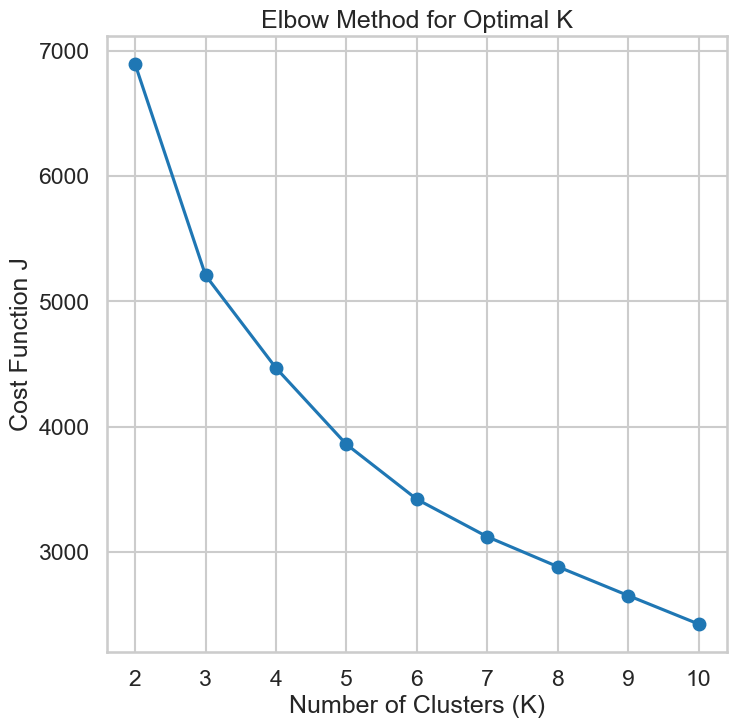

In [211]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the range of values for the number of clusters (K)
min_clusters = 2
max_clusters = 10
num_clusters_range = range(min_clusters, max_clusters + 1)

# Initialize an empty list to store the cost function J for each value of K
costs = []

# Loop through each value of K
for K in num_clusters_range:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(data2)  # Assuming data_points is your dataset
    
    # Calculate the inertia (cost function J) and append it to the list
    costs.append(kmeans.inertia_)

# Plot J versus K
plt.plot(num_clusters_range, costs, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Cost Function J')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()



C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

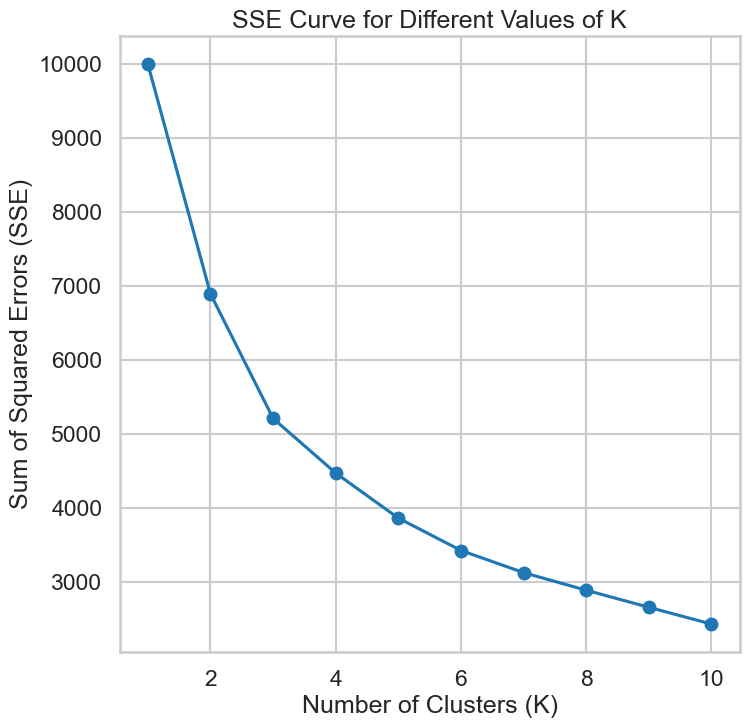

In [212]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have already loaded your dataset into data_points

# Define the range of values for the number of clusters (K)
min_clusters = 1
max_clusters = 10
num_clusters_range = range(min_clusters, max_clusters + 1)

# Initialize an empty list to store the SSE for each value of K
sse_values = []

# Loop through each value of K
for K in num_clusters_range:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(data2)
    
    # Calculate the SSE (inertia) and append it to the list
    sse_values.append(kmeans.inertia_)

# Plotting the SSE curve
plt.plot(num_clusters_range, sse_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE Curve for Different Values of K')
plt.grid(True)
plt.show()


In [213]:
def GUC_Distance(Cluster_Centroids, Data_points, Distance_Type):
    """
    Calculate distances between cluster centroids and data points.

    Parameters:
    - Cluster_Centroids (ndarray): Array of shape (K, num_features) representing the centroids of K clusters.
    - Data_points (ndarray): Array of shape (num_points, num_features) representing the data points.
    - Distance_Type (str): Type of distance metric to use. Options: 'euclidean', 'pearson'.

    Returns:
    - Cluster_Distances (ndarray): Array of shape (num_points, K) containing distances between each data point and each cluster centroid.
    """
    if Distance_Type == 'euclidean':
        # Calculate Euclidean distance
        distances = np.sqrt(np.sum((Data_points[:, np.newaxis, :] - Cluster_Centroids) ** 2, axis=2))
    elif Distance_Type == 'pearson':
        # Calculate Pearson correlation distance
        mean_data = np.mean(Data_points, axis=0, keepdims=True)
        mean_centroids = np.mean(Cluster_Centroids, axis=0, keepdims=True)
        numerator = np.sum((Data_points - mean_data)[:, np.newaxis, :] * (Cluster_Centroids - mean_centroids), axis=2)
        denominator = np.sqrt(np.sum((Data_points - mean_data) ** 2, axis=1, keepdims=True)) @ np.sqrt(np.sum((Cluster_Centroids - mean_centroids) ** 2, axis=1, keepdims=True)).T
        distances = 1 - numerator / denominator
    else:
        raise ValueError("Distance_Type must be either 'euclidean' or 'pearson'.")

    return distances



In [214]:
num_features = 5  
K = 3  # Number of clusters

# Randomly initialize cluster centroids
Cluster_Centroids = np.random.rand(K, num_features)  # This will generate random centroids with shape (K, num_features)
Cluster_DistancesP = GUC_Distance(Cluster_Centroids, data2, Distance_Type = 'pearson' )
Cluster_DistancesE = GUC_Distance(Cluster_Centroids, data2, Distance_Type = 'euclidean')
print(Cluster_DistancesP)
print(Cluster_DistancesE)
# Based on the output we have four cluster centroids which is (4, num_features) each row in the metrix corresponds to a centroid, 
# and the number of rows (in this case, 4) represents the number of centroids.

[[0.53319529 1.82069992 0.74310126]
 [1.68475953 0.92853689 0.12870562]
 [0.71794842 0.83276864 1.57564767]
 ...
 [1.33578326 0.24692218 1.36415075]
 [1.44236865 0.15736207 1.31498187]
 [1.39602304 0.24006634 1.2881283 ]]
[[2.47600092 3.14600477 2.64942077]
 [2.85343225 1.91776329 1.8320744 ]
 [2.76169068 2.45047242 3.03911227]
 ...
 [3.90191664 3.09344385 3.78934583]
 [3.29935546 2.34875928 3.10884596]
 [4.23766843 3.3998203  4.06943343]]


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [228]:
# def GUC_Kmean(Data_points, Number_of_Clusters, Distance_Type ):
#     tol=1e-4
#     # Initialize cluster centroids randomly within the range of data points
#     min_values = np.min(Data_points, axis=0)
#     max_values = np.max(Data_points, axis=0)
#     cluster_centroids = np.random.uniform(min_values, max_values, size=(Number_of_Clusters, Data_points.shape[1]))

#     # Loop until convergence or tolerance is reached
#     while True:
#         # Calculate distances between cluster centroids and data points
#         cluster_distances = GUC_Distance(cluster_centroids, Data_points, Distance_Type)

#         # Cluster Assignment: Find the index of the nearest centroid for each data point
#         nearest_centroid_indices = np.argmin(cluster_distances, axis=1)

#         # Update cluster centroids: Calculate the mean of data points in each cluster
#         new_centroids = []
#         for k in range(Number_of_Clusters):
#             cluster_points = Data_points[nearest_centroid_indices == k]
#             if len(cluster_points) > 0:
#                 new_centroids.append(np.mean(cluster_points, axis=0))
#             else:
#                 # Skip empty clusters
#                 new_centroids.append(cluster_centroids[k])
#         new_centroids = np.array(new_centroids)

#         # Check for convergence: If the change in centroids falls below the tolerance, stop iterating
#         if np.linalg.norm(new_centroids - cluster_centroids) < tol:
#             break

#         # Update cluster centroids
#         cluster_centroids = new_centroids

#     # Calculate cluster metric (e.g., sum of squared error)
#     cluster_metric = np.sum((Data_points - cluster_centroids[nearest_centroid_indices]) ** 2)

#     return cluster_distances, cluster_metric, cluster_centroids


In [244]:
import numpy as np
import matplotlib.pyplot as plt

def GUC_KmeanP(Data_points, Number_of_Clusters, Distance_Type):
    tol = 1e-4
    # Initialize cluster centroids randomly within the range of data points
    min_values = np.min(Data_points, axis=0)
    max_values = np.max(Data_points, axis=0)
    cluster_centroids = np.random.uniform(min_values, max_values, size=(Number_of_Clusters, Data_points.shape[1]))

    # Loop until convergence or tolerance is reached
    while True:
        # Calculate distances between cluster centroids and data points
        cluster_distances = GUC_Distance(cluster_centroids, Data_points, Distance_Type)

        # Cluster Assignment: Find the index of the nearest centroid for each data point
        nearest_centroid_indices = np.argmin(cluster_distances, axis=1)

        # Update cluster centroids: Calculate the mean of data points in each cluster
        new_centroids = []
        for k in range(Number_of_Clusters):
            cluster_points = Data_points[nearest_centroid_indices == k]
            if len(cluster_points) > 0:
                new_centroids.append(np.mean(cluster_points, axis=0))
            else:
                # Skip empty clusters
                new_centroids.append(cluster_centroids[k])
        new_centroids = np.array(new_centroids)

        # Check for convergence: If the change in centroids falls below the tolerance, stop iterating
        if np.linalg.norm(new_centroids - cluster_centroids) < tol:
            break

        # Update cluster centroids
        cluster_centroids = new_centroids

    # Plot the clusters
    plt.figure()
    for k in range(Number_of_Clusters):
        cluster_points = Data_points[nearest_centroid_indices == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {k+1}')
    plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], marker='x', color='red', label='Centroids')
    plt.title('Clustered Data')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()

    # Calculate cluster metric (e.g., sum of squared error)
    cluster_metric = np.sum((Data_points - cluster_centroids[nearest_centroid_indices]) ** 2)

    return cluster_distances, cluster_metric, cluster_centroids


In [229]:
# Call the function for Euclidean distance
cluster_distancesE, cluster_metricE, centroidsE = GUC_Kmean(data2, Number_of_Clusters=3, Distance_Type='euclidean')

# Call the function for Pearson distance
# cluster_distancesP, cluster_metricP, centroidsP = GUC_Kmean(data2, Number_of_Clusters=3, Distance_Type='pearson')

# Display the results
print("Cluster Distances (Euclidean):")
print(cluster_distancesE)
print("\nCluster Metric (Euclidean):", cluster_metricE)
print("\nCluster Centroids (Euclidean):", centroidsE)

# print("\nCluster Distances (Pearson):")
# print(cluster_distancesP)
# print("\nCluster Metric (Pearson):", cluster_metricP)
# print("\nCluster Centroids (Pearson):", centroidsP)
# Cluster Distances (Euclidean):
# This is a matrix where each row represents a data point, and each column represents the distance of that data point to each cluster centroid. For example, the element at position (i, j) represents the distance of the i-th data point to the j-th cluster centroid.

# Cluster Metric (Euclidean):
# This is a single value representing the overall clustering quality using the specified distance metric (Euclidean in this case). It is often computed as the sum of squared errors (SSE), which measures the total squared distance of each data point to its assigned cluster centroid. In your output, the value is approximately 5207.765382122496.

# Cluster Centroids (Euclidean):
# This is a matrix where each row represents a cluster centroid, and each column represents a feature. Each row contains the coordinates of the centroid in the feature space. In your output, there are three centroids (since it seems you used three clusters), and each centroid has five coordinates (features).


Cluster Distances (Euclidean):
[[4.40158334 1.72755852 3.64001579]
 [3.10065342 3.53952869 1.29371928]
 [1.55929931 3.33687161 3.19096868]
 ...
 [1.66680595 4.90119069 3.17878362]
 [0.94459663 4.16200466 2.87108063]
 [1.917426   5.32982175 3.44931055]]

Cluster Metric (Euclidean): 5207.784085631286

Cluster Centroids (Euclidean): [[-0.29758792 -0.20934139 -0.60094872 -0.67486139 -0.88548608]
 [ 1.6798234   1.6602859   0.94745634  0.4387405   0.41631045]
 [-0.29009139 -0.38505986  0.33873748  0.61685107  0.86963675]]


## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [219]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [220]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [221]:
import matplotlib.pyplot as plt

def display_clusterUP(X, km=[], num_clusters=0):
    color = 'brgcmyk'  # List of colors
    alpha = 0.5  # Color opacity
    s = 20  # Marker size

    num_dimensions = X.shape[1]  # Get the number of dimensions

    fig, axs = plt.subplots(num_dimensions - 1, num_dimensions - 1, figsize=(15, 15))
    
    for i in range(num_dimensions - 1):
        for j in range(i + 1, num_dimensions):
            ax = axs[i, j-1]  # Select the subplot
            ax.set_title(f'Dimensions {i+1} vs {j+1}')  # Set subplot title
            if num_clusters == 0:
                ax.scatter(X[:, i], X[:, j], c='b', alpha=alpha, s=s)
            else:
                for k in range(num_clusters):
                    ax.scatter(X[km.labels_ == k, i], X[km.labels_ == k, j], c=color[k], alpha=alpha, s=s)
                    ax.scatter(km.cluster_centers_[k][i], km.cluster_centers_[k][j], c=color[k], marker='x', s=100)
    
    plt.tight_layout()
    plt.show()


# Try and error part 

In [272]:
# import numpy as np

# def GUC_KmeanP2(Data_points, Number_of_Clusters, Distance_Type):
#     tol = 1e-4
#     # Initialize cluster centroids randomly within the range of data points
#     min_values = np.min(Data_points, axis=0)
#     max_values = np.max(Data_points, axis=0)
#     cluster_centroids = np.random.uniform(min_values, max_values, size=(Number_of_Clusters, Data_points.shape[1]))

#     # Loop until convergence or tolerance is reached
#     while True:
#         # Calculate distances between cluster centroids and data points
#         cluster_distances = GUC_Distance(cluster_centroids, Data_points, Distance_Type)

#         # Cluster Assignment: Find the index of the nearest centroid for each data point
#         nearest_centroid_indices = np.argmin(cluster_distances, axis=1)

#         # Update cluster centroids: Calculate the mean of data points in each cluster
#         new_centroids = []
#         for k in range(Number_of_Clusters):
#             cluster_points = Data_points[nearest_centroid_indices == k]
#             if len(cluster_points) > 0:
#                 new_centroids.append(np.mean(cluster_points, axis=0))
#             else:
#                 # Skip empty clusters
#                 new_centroids.append(cluster_centroids[k])
#         new_centroids = np.array(new_centroids)

#         # Check for convergence: If the change in centroids falls below the tolerance, stop iterating
#         if np.linalg.norm(new_centroids - cluster_centroids) < tol:
#             break

#         # Update cluster centroids
#         cluster_centroids = new_centroids

#     # Assign cluster labels to data points
#     cluster_labels = nearest_centroid_indices

#     # Calculate cluster metric (e.g., sum of squared error)
#     cluster_metric = np.sum((Data_points - cluster_centroids[nearest_centroid_indices]) ** 2)

#     # Return an object with a 'labels_' attribute containing the cluster labels
#     class ClusterResult:
#         def __init__(self, labels):
#             self.labels_ = labels

#     return ClusterResult(cluster_labels), cluster_metric, cluster_centroids


In [274]:
# import matplotlib.pyplot as plt

# def display_clusterUP2(X, cluster_labels, cluster_centroids=None, num_clusters=None):
#     color = 'brgcmyk'  # List of colors
#     alpha = 0.5  # Color opacity
#     s = 20  # Marker size

#     num_dimensions = X.shape[1]  # Get the number of dimensions

#     fig, axs = plt.subplots(num_dimensions - 1, num_dimensions - 1, figsize=(15, 15))
    
#     for i in range(num_dimensions - 1):
#         for j in range(i + 1, num_dimensions):
#             ax = axs[i, j-1]  # Select the subplot
#             ax.set_title(f'Dimensions {i+1} vs {j+1}')  # Set subplot title
#             if num_clusters is None:
#                 ax.scatter(X[:, i], X[:, j], c='b', alpha=alpha, s=s)
#             else:
#                 for k in range(num_clusters):
#                     ax.scatter(X[cluster_labels == k, i], X[cluster_labels == k, j], c=color[k], alpha=alpha, s=s)
#                     if cluster_centroids is not None:
#                         ax.scatter(cluster_centroids[k][i], cluster_centroids[k][j], c=color[k], marker='x', s=100)
    
#     plt.tight_layout()
#     plt.show()


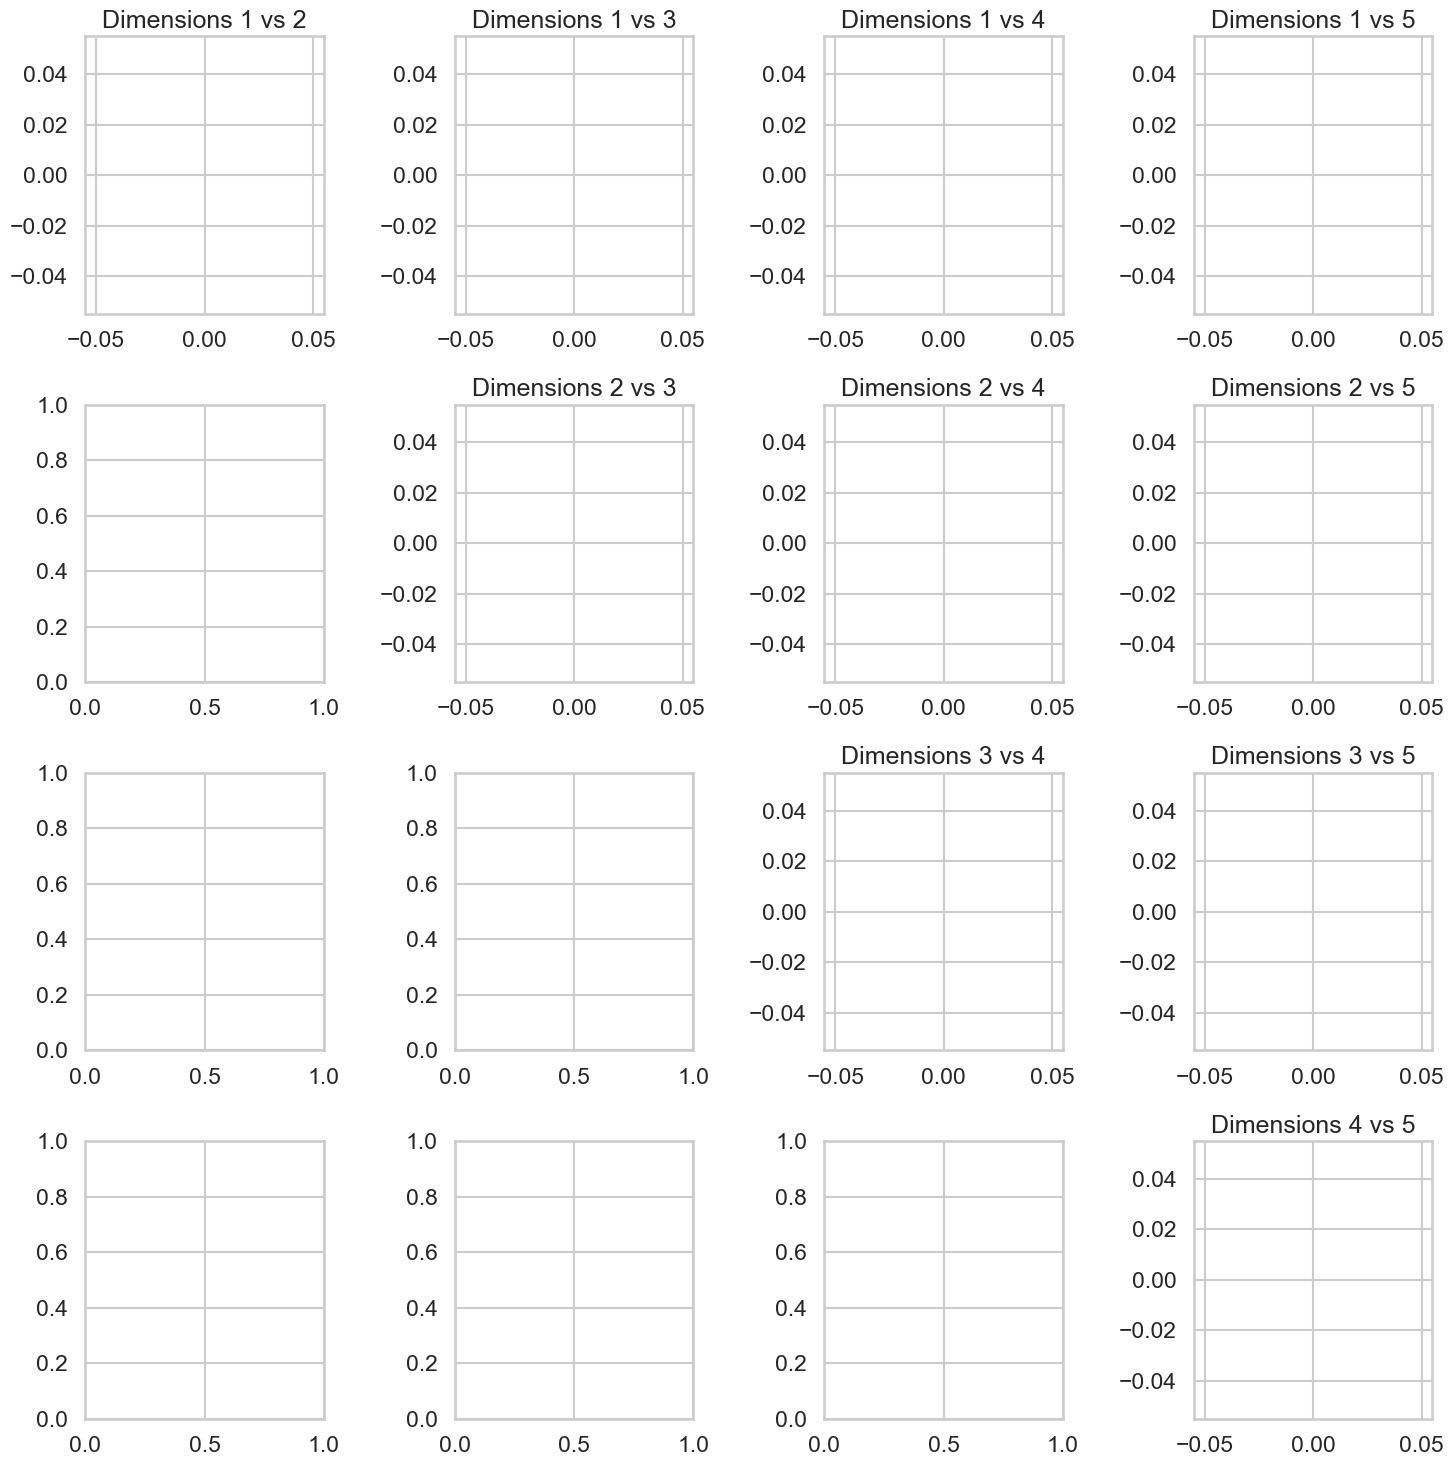

In [275]:
# # Assuming you have already imported necessary libraries and defined the display_clusterUP function

# # Call the GUC_KmeanP function with your data, number of clusters, and distance type
# cluster_labels, cluster_metric, cluster_centroids = GUC_KmeanP2(data2, 3, 'euclidean')

# # Visualize the clustered data using the display_clusterUP function
# display_clusterUP2(data2, cluster_labels, num_clusters=3)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


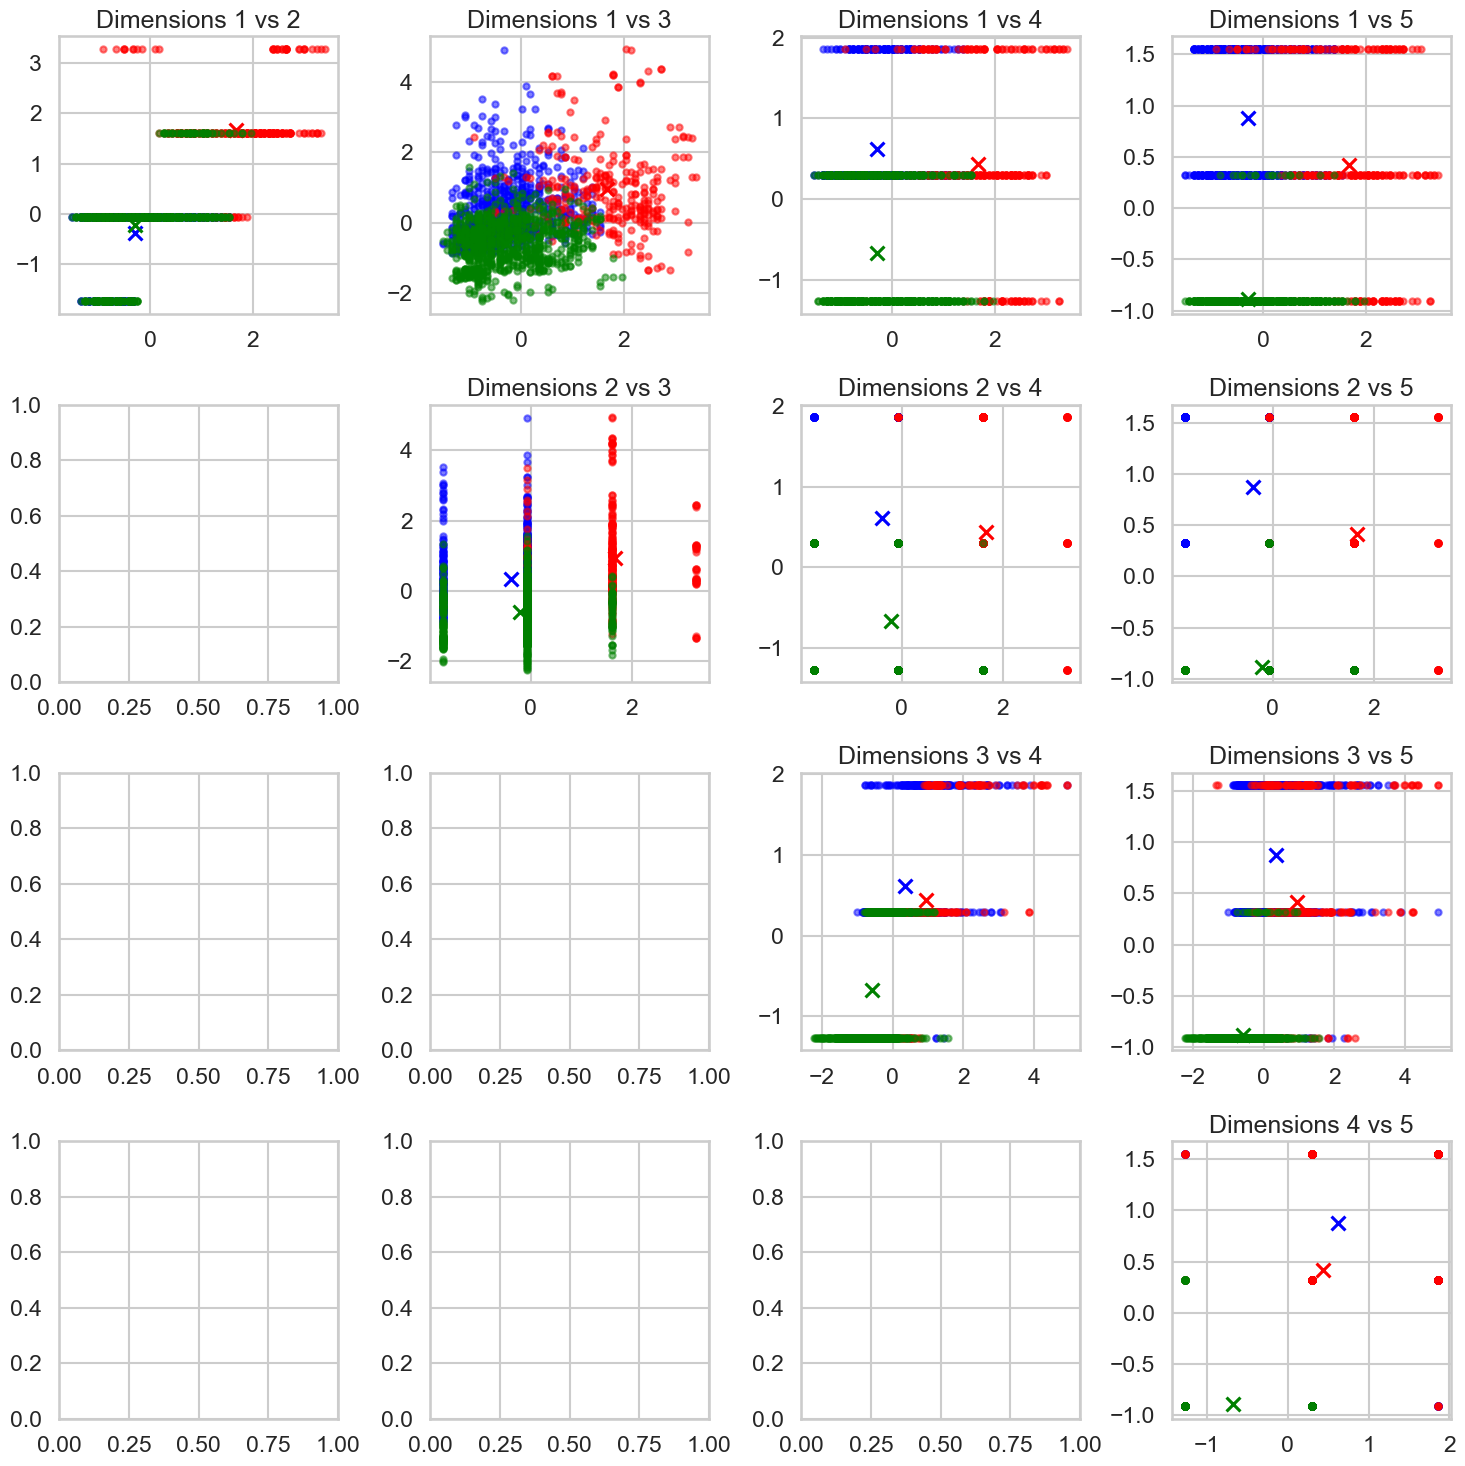

In [222]:
# Assuming you have already imported necessary libraries and defined the display_clusterUP function

# Import KMeans from scikit-learn
from sklearn.cluster import KMeans

# Fit KMeans model to your data
km = KMeans(n_clusters=3)
km.fit(data2)

# Call the display_clusterUP function with the fitted KMeans model and number of clusters
display_clusterUP(data2, km, num_clusters=3)


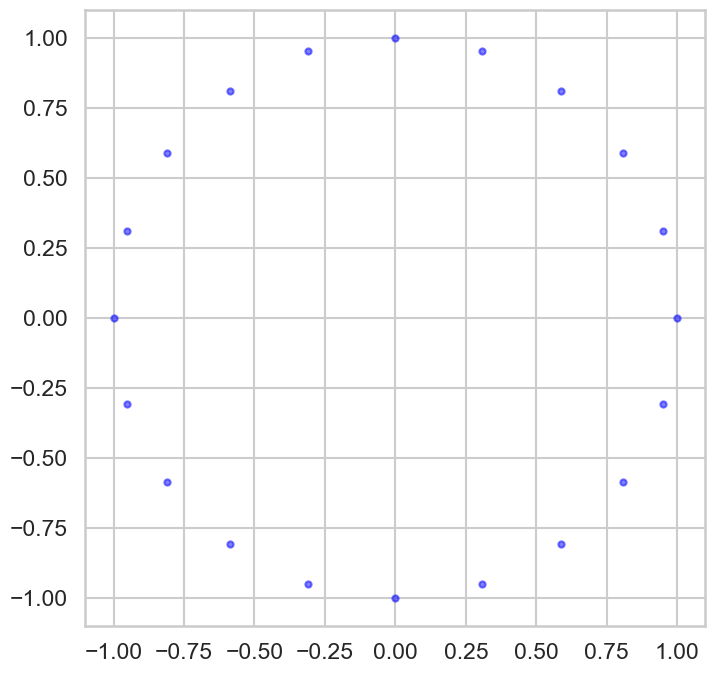

In [223]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X1)

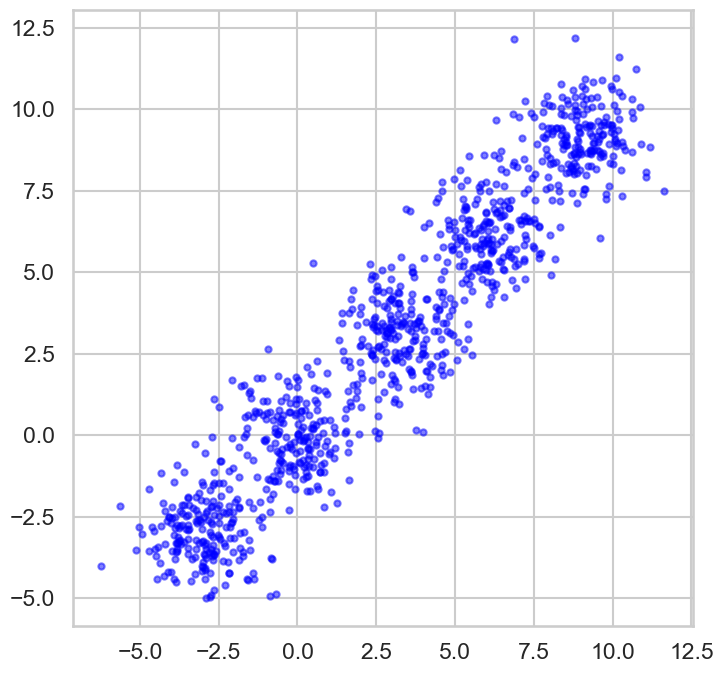

In [224]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X2)

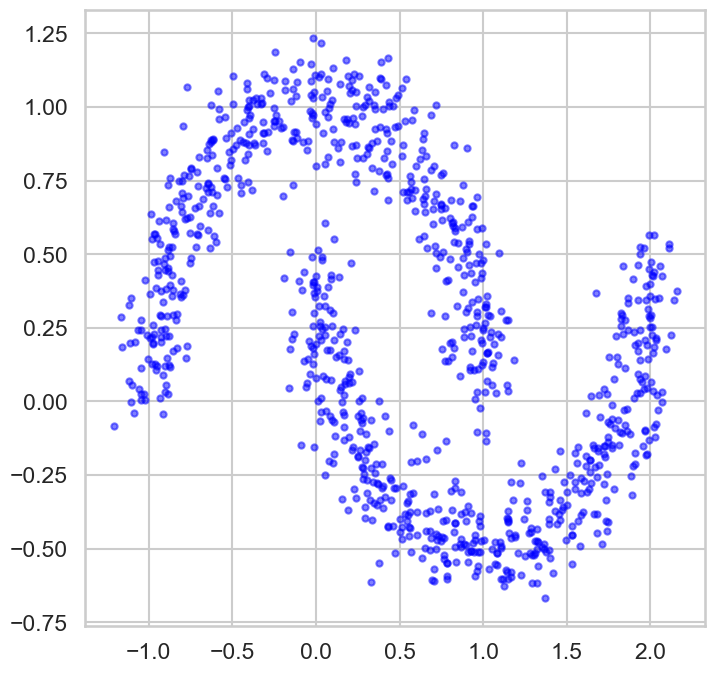

In [225]:
n_samples = 1000
X3, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X3)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

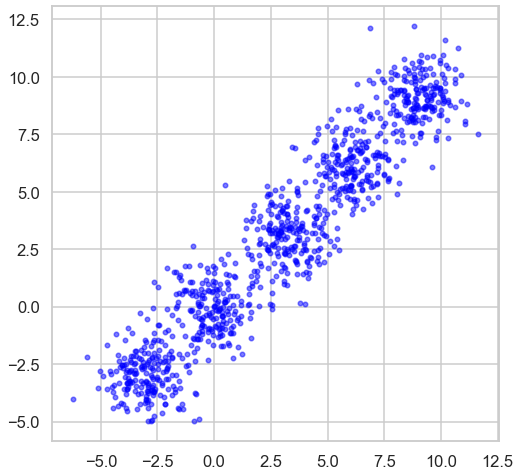

In [6]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

#### 2.3. Example 3 : moons Data Gen and display 

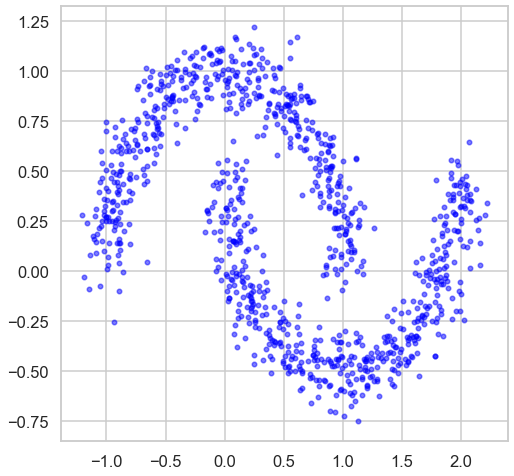

In [18]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

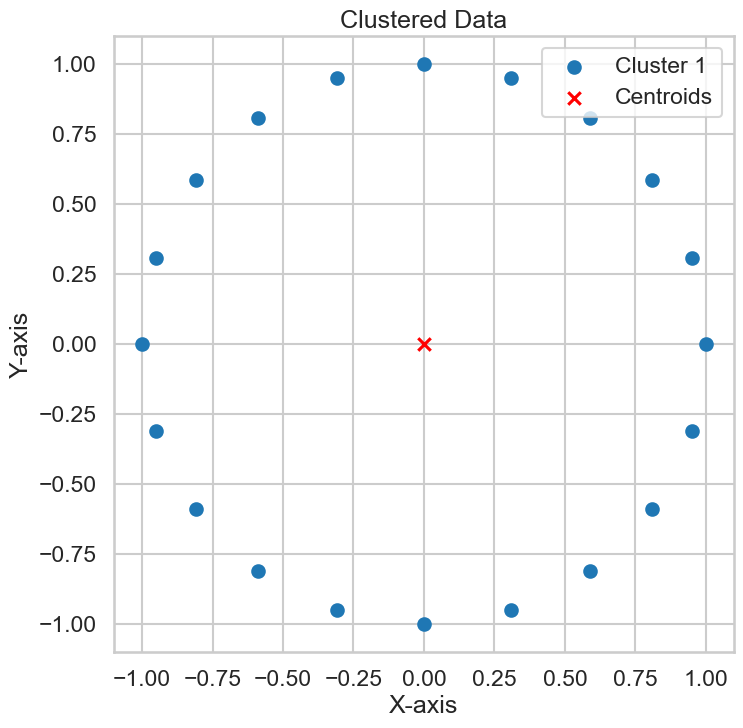

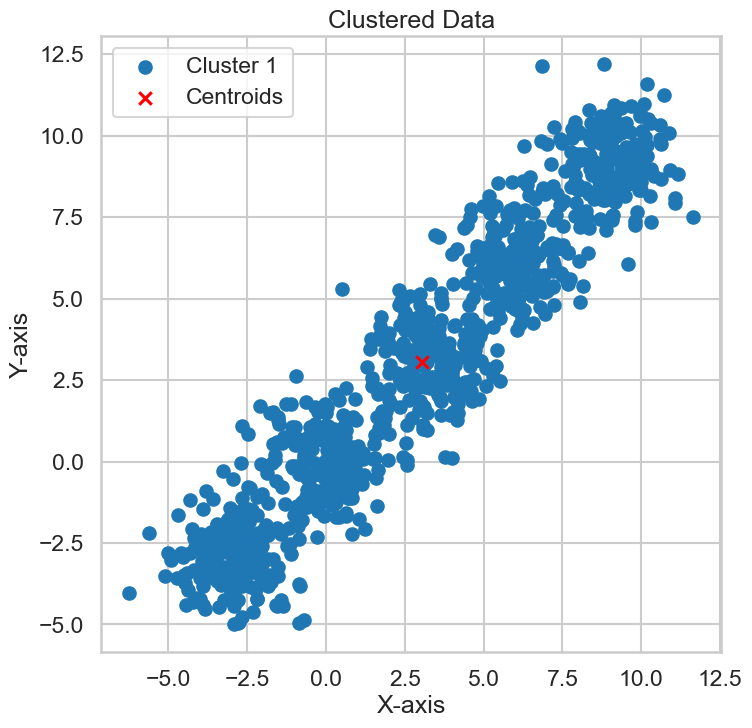

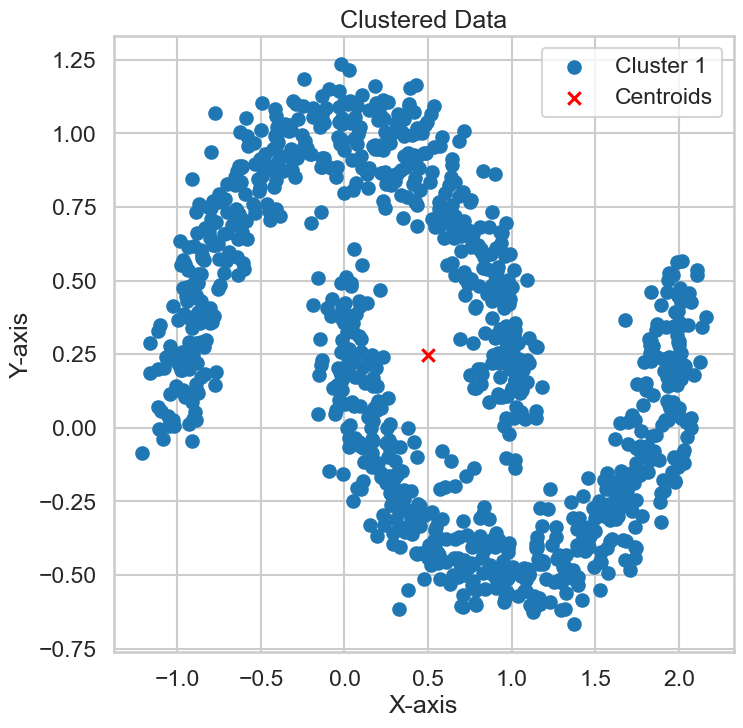

Results for dataset 1:
Cluster centroids: [[-3.33066907e-17 -1.66533454e-17]]
Cluster metric: 20.0
Cluster distances: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Results for dataset 2:
Cluster centroids: [[3.03318614 3.05698215]]
Cluster metric: 38360.37098792802
Cluster distances: [[ 8.30864614]
 [ 7.03990823]
 [ 8.88018717]
 [ 6.91499749]
 [ 8.5260451 ]
 [ 9.20606496]
 [ 9.85207372]
 [10.19818162]
 [ 9.08984942]
 [10.19659896]
 [ 7.76758981]
 [ 9.56897923]
 [ 8.86679404]
 [ 9.15911719]
 [ 9.18222836]
 [ 7.85501988]
 [ 9.33708934]
 [ 8.95083965]
 [ 9.90905883]
 [ 9.40908166]
 [ 7.91672318]
 [ 8.84496582]
 [10.11687376]
 [ 8.19563062]
 [ 9.67077718]
 [ 8.6077896 ]
 [ 8.64158013]
 [ 7.1620313 ]
 [ 9.36794347]
 [ 7.63759942]
 [ 9.02116434]
 [10.17750014]
 [ 7.02511713]
 [ 7.92532465]
 [ 8.77978648]
 [ 7.25190162]
 [ 7.55076248]
 [10.11332181]
 [ 8.70374474]
 [10.00076683]
 [ 8.46089515]
 [ 7.9990393 ]
 [ 9.47763

In [250]:
import numpy as np

# Define your datasets
dataset1 = X1
dataset2 = X2
dataset3 = X3

# Call the GUC_Kmean function on each dataset
cluster_distances1, cluster_metric1, cluster_centroids1 = GUC_KmeanP(dataset1, 1, 'euclidean')
cluster_distances2, cluster_metric2, cluster_centroids2 = GUC_KmeanP(dataset2, 1, 'euclidean')
cluster_distances3, cluster_metric3, cluster_centroids3 = GUC_KmeanP(dataset3, 1, 'euclidean')

# Print or use the results as needed
print("Results for dataset 1:")
print("Cluster centroids:", cluster_centroids1)
print("Cluster metric:", cluster_metric1)
print("Cluster distances:", cluster_distances1)

print("Results for dataset 2:")
print("Cluster centroids:", cluster_centroids2)
print("Cluster metric:", cluster_metric2)
print("Cluster distances:", cluster_distances2)

print("Results for dataset 3:")
print("Cluster centroids:", cluster_centroids3)
print("Cluster metric:", cluster_metric3)
print("Cluster distances:", cluster_distances3)


1


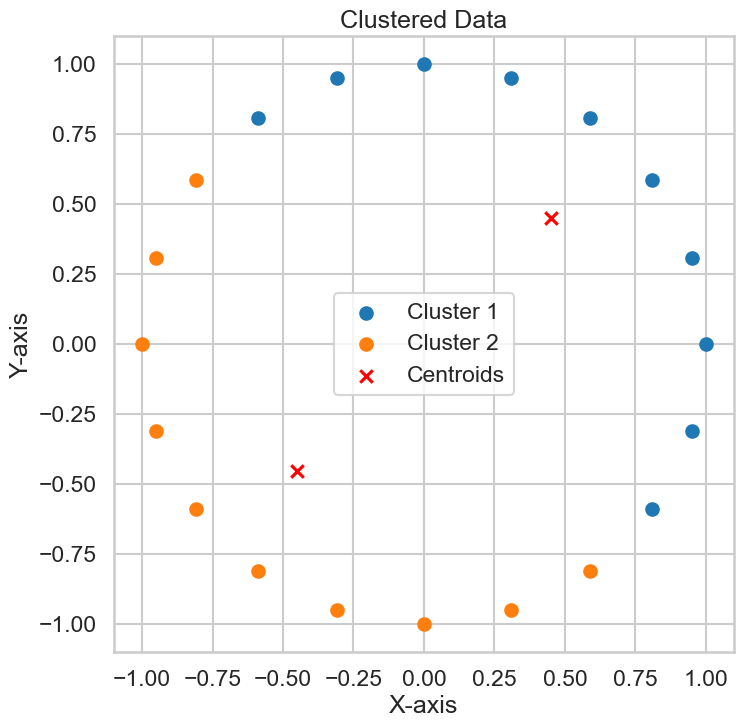

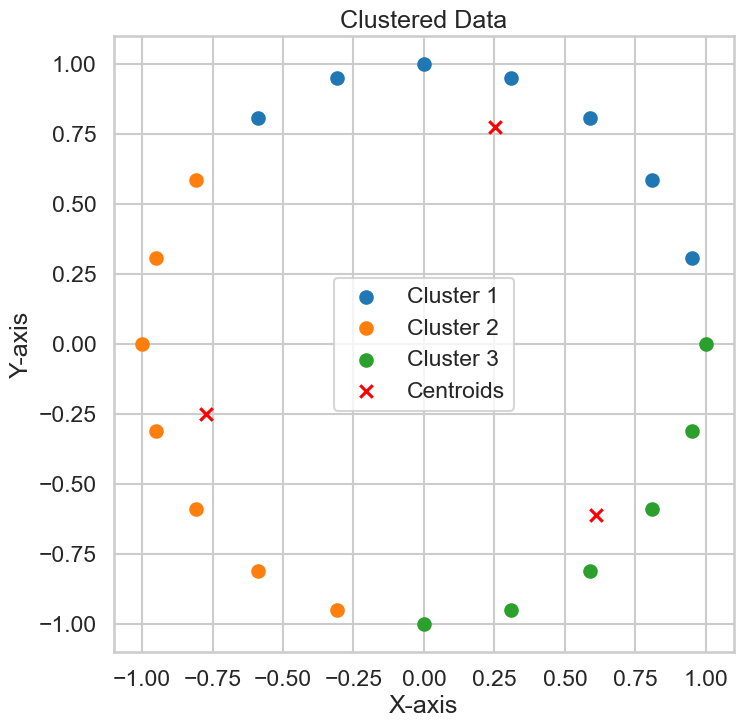

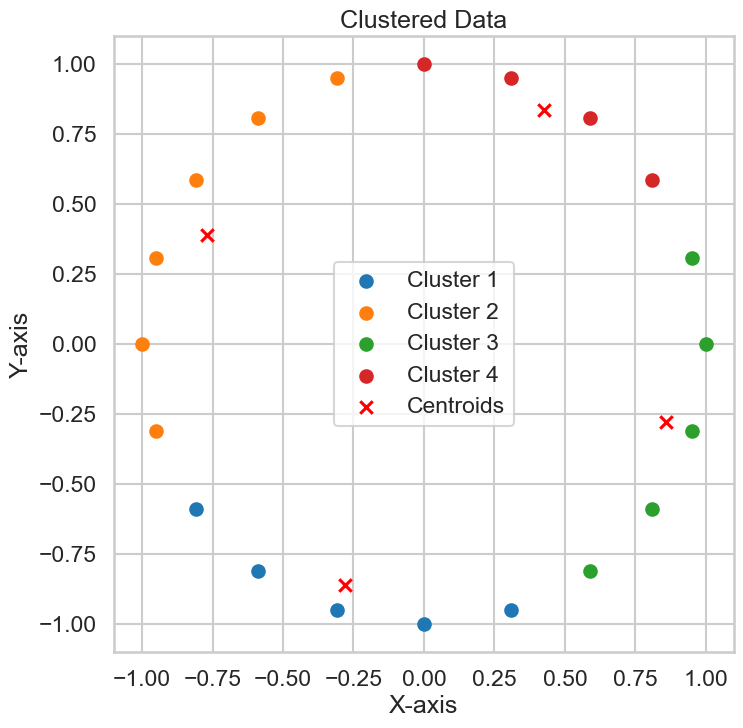

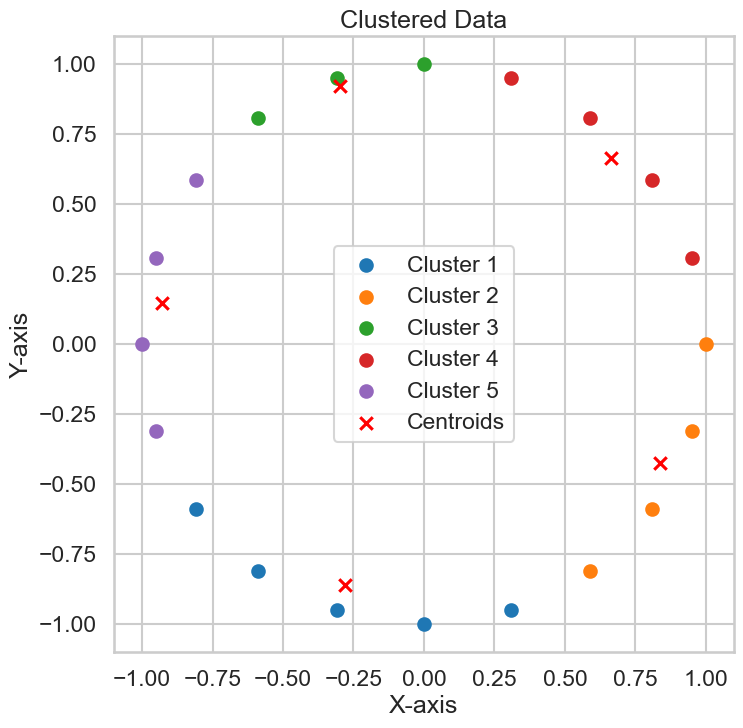

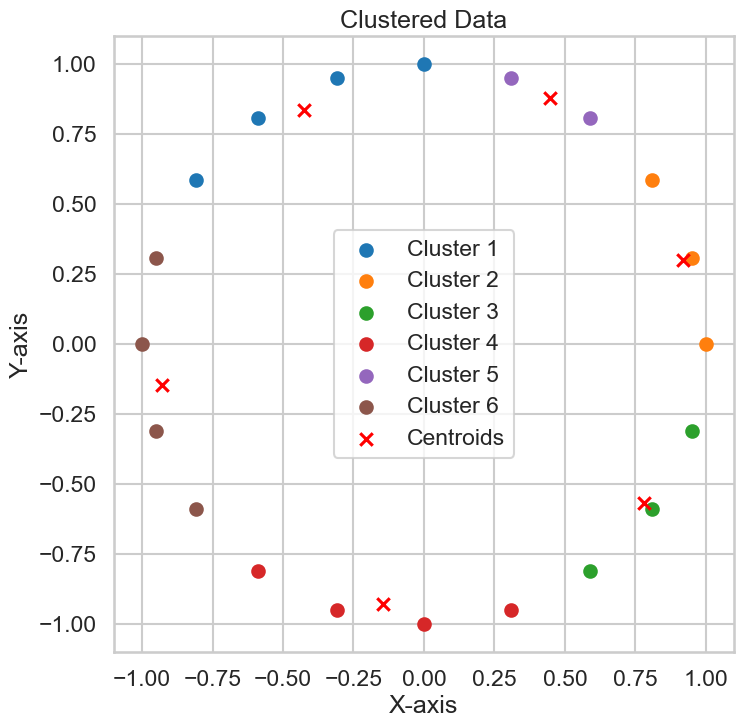

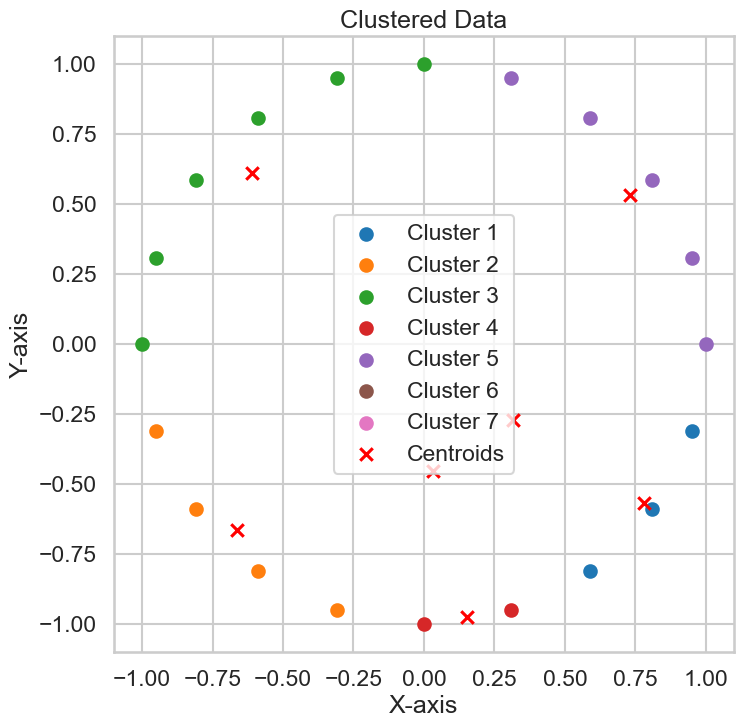

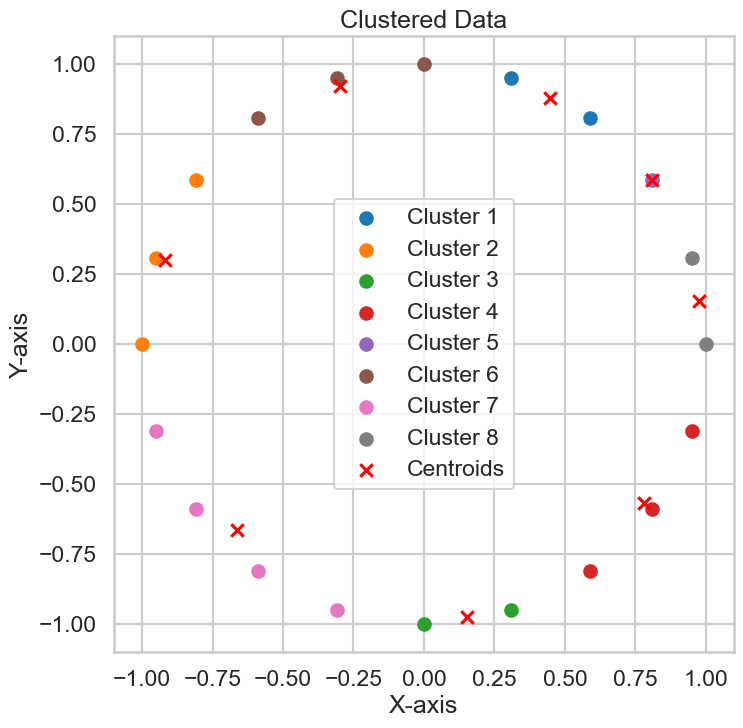

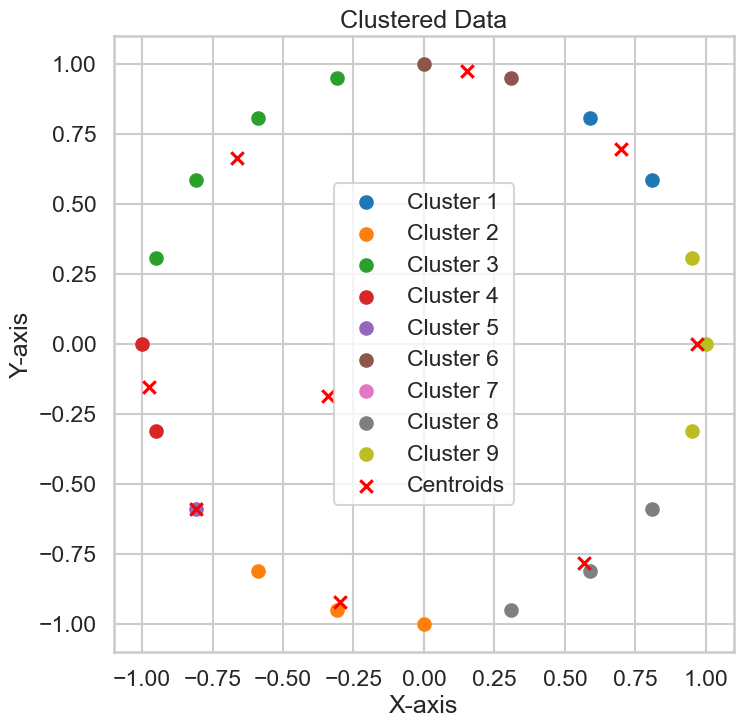

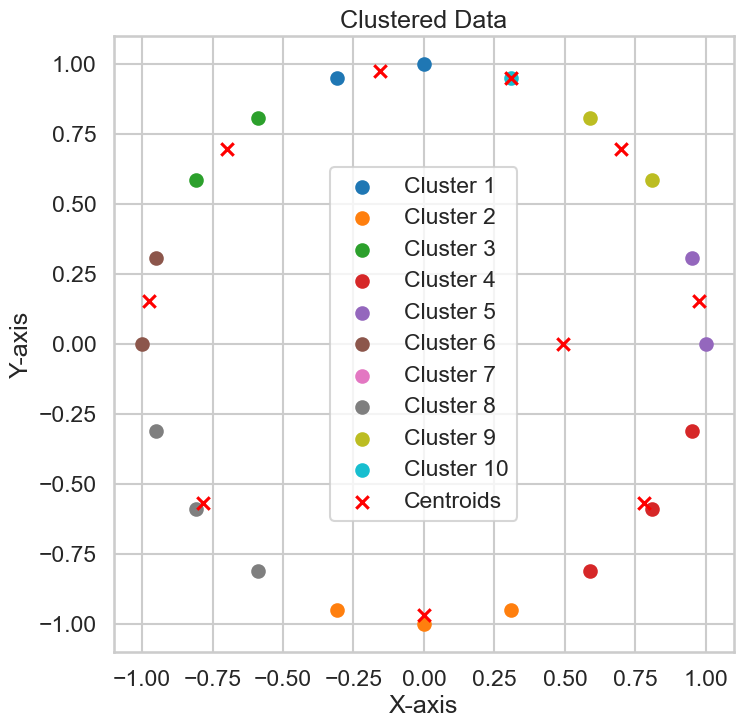

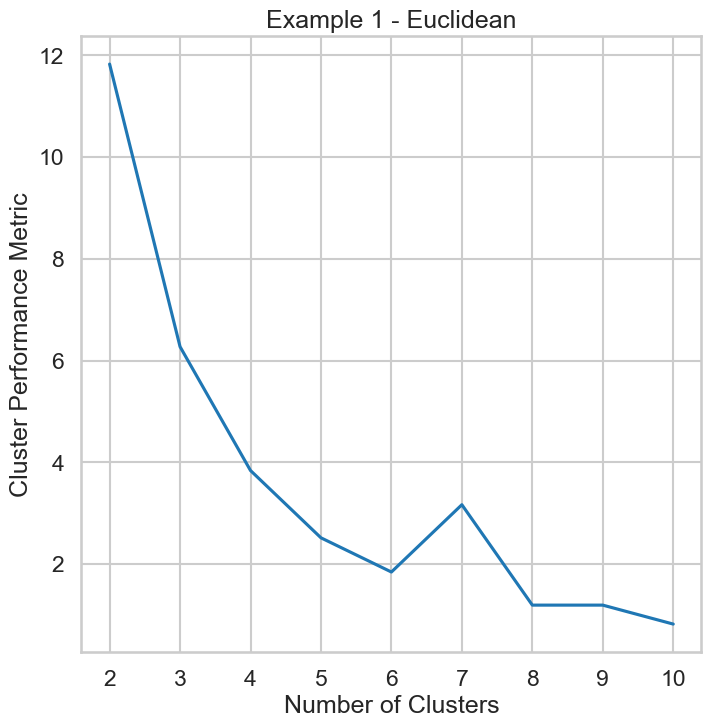

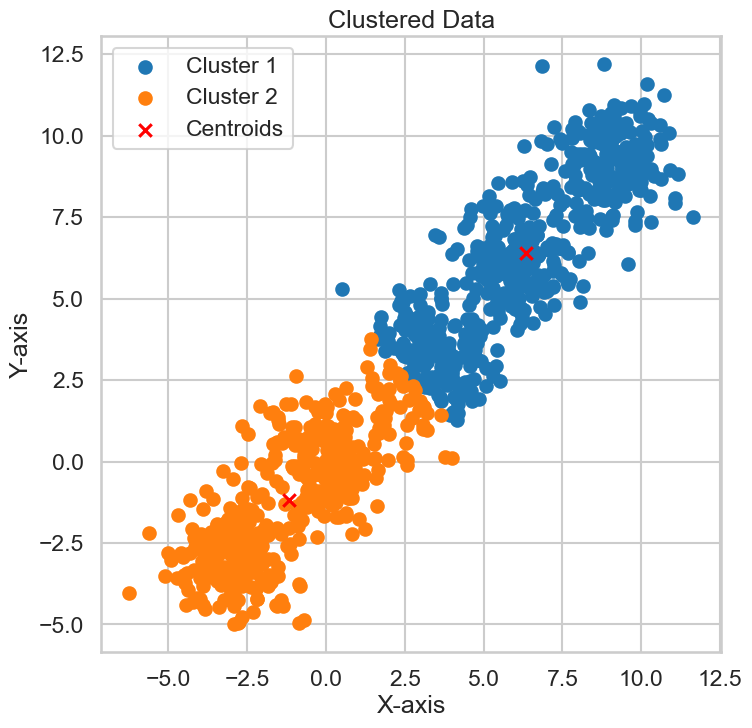

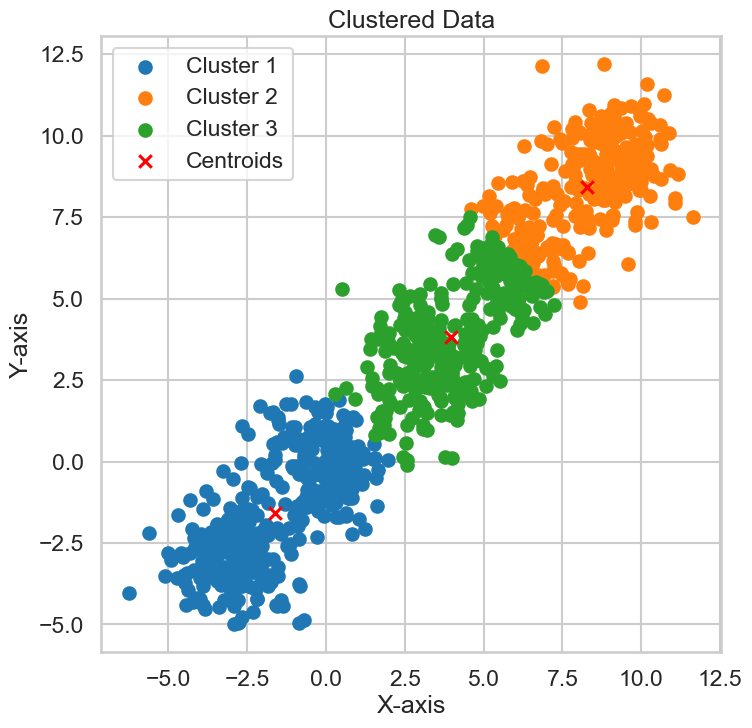

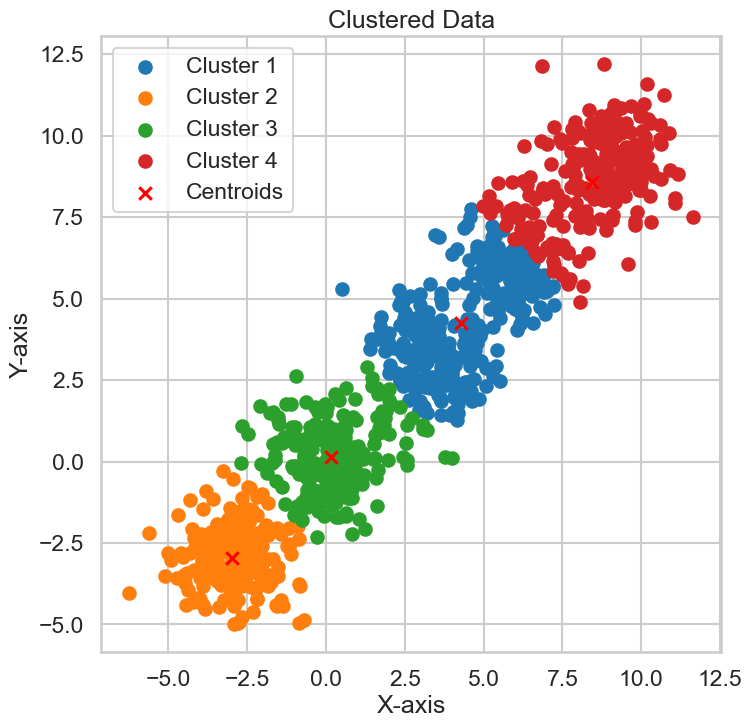

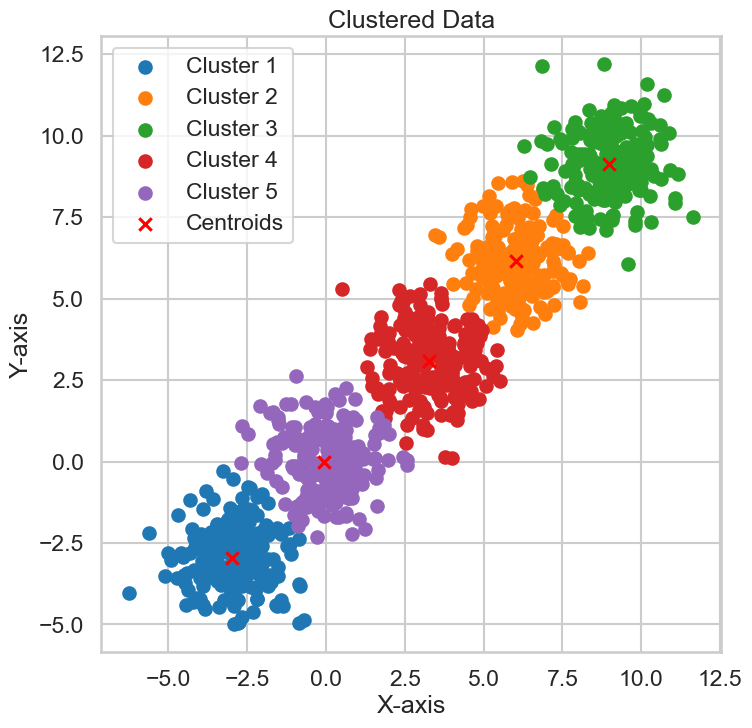

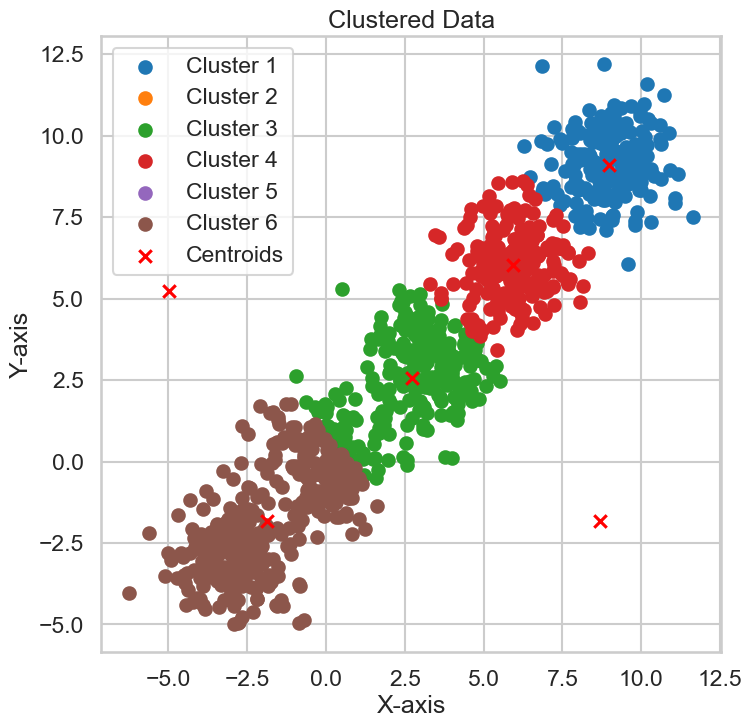

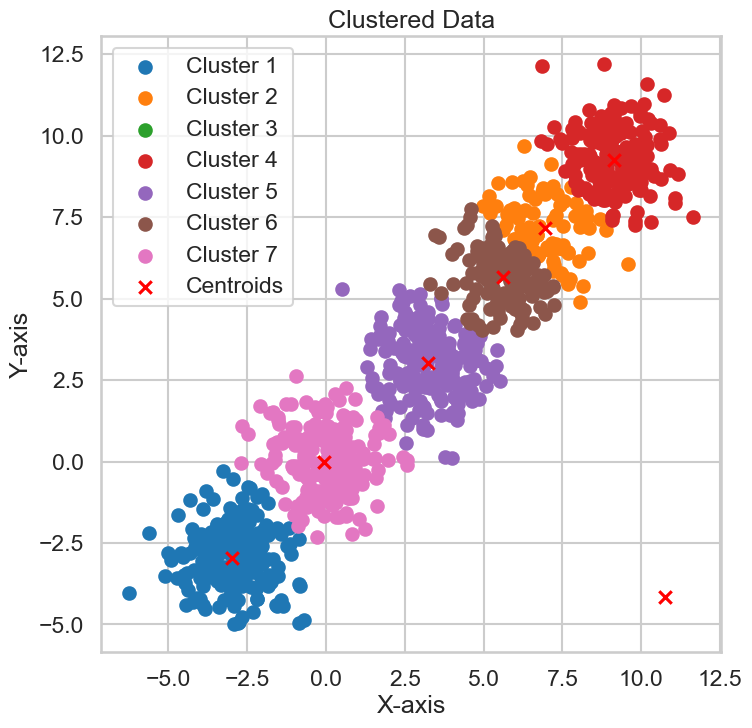

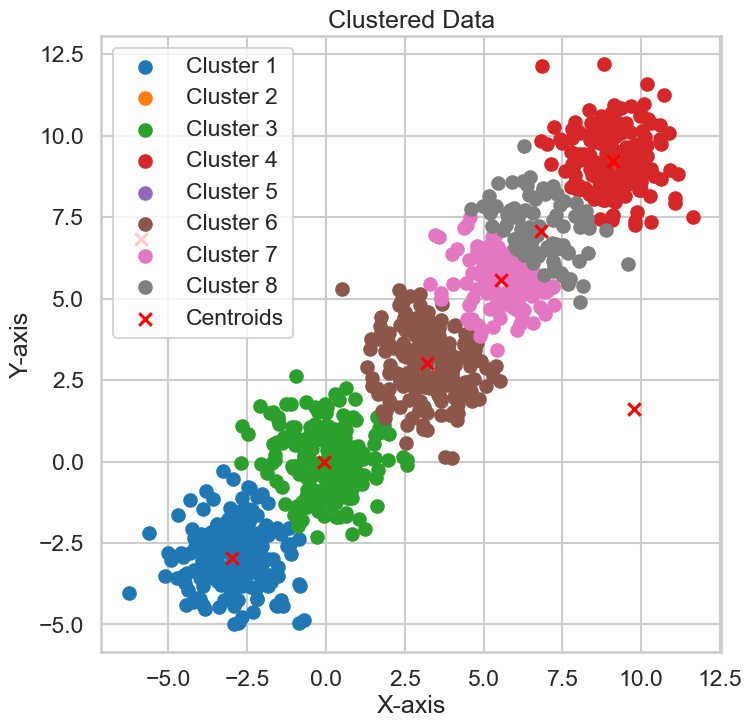

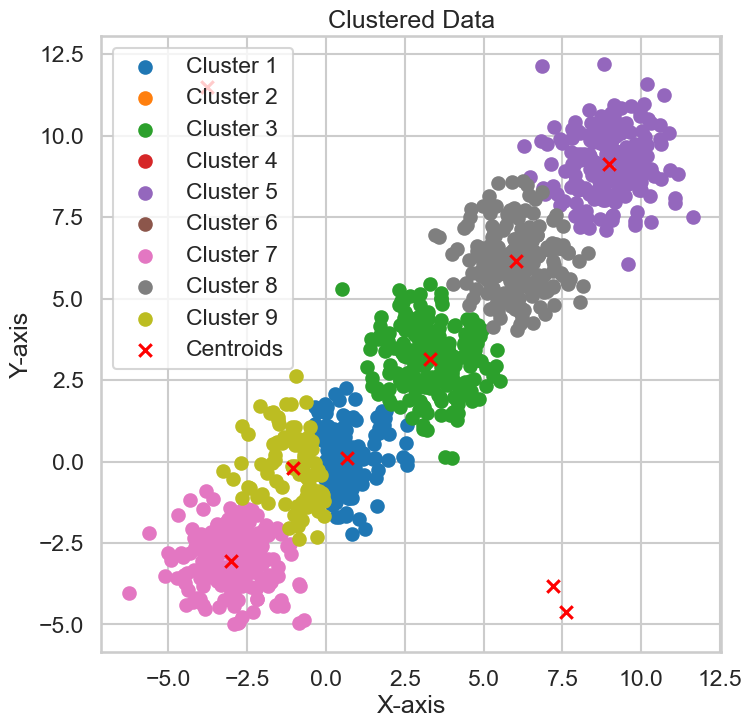

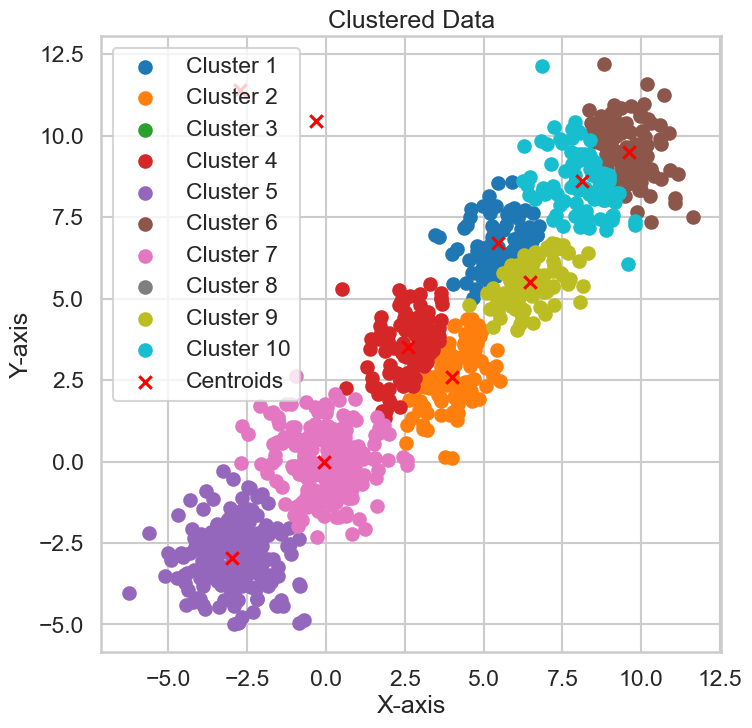

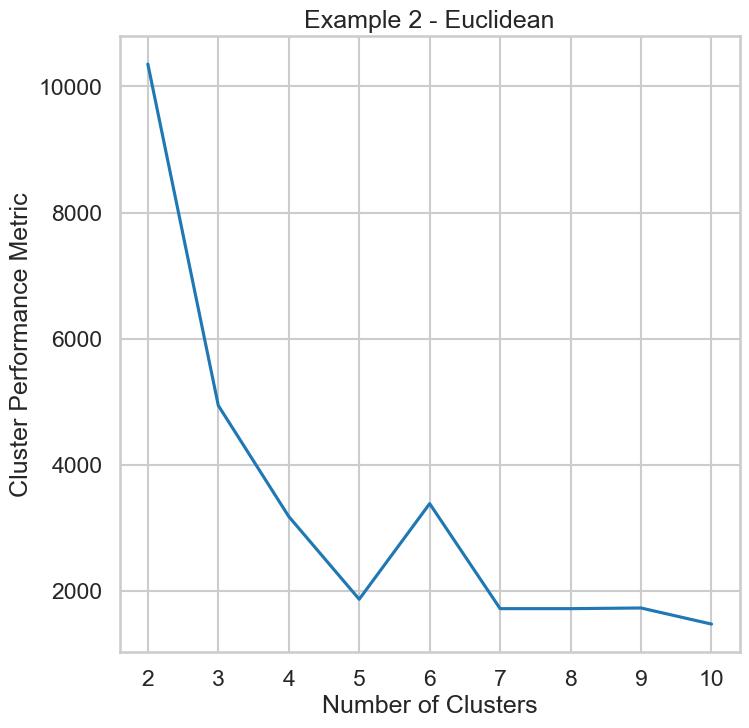

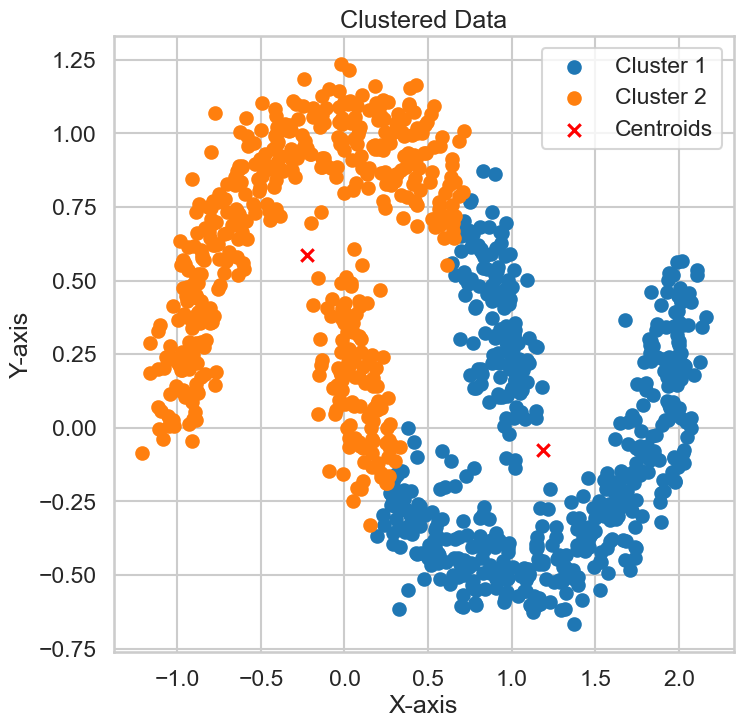

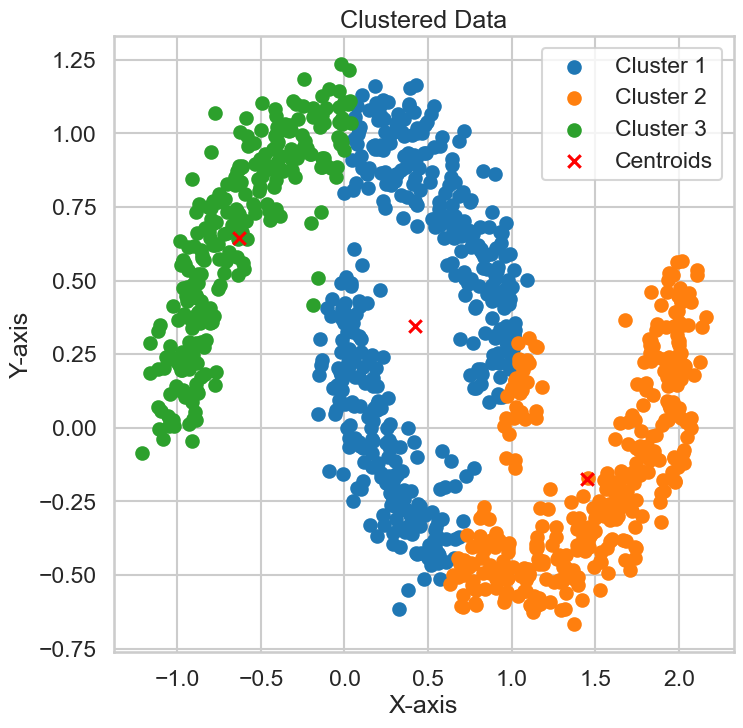

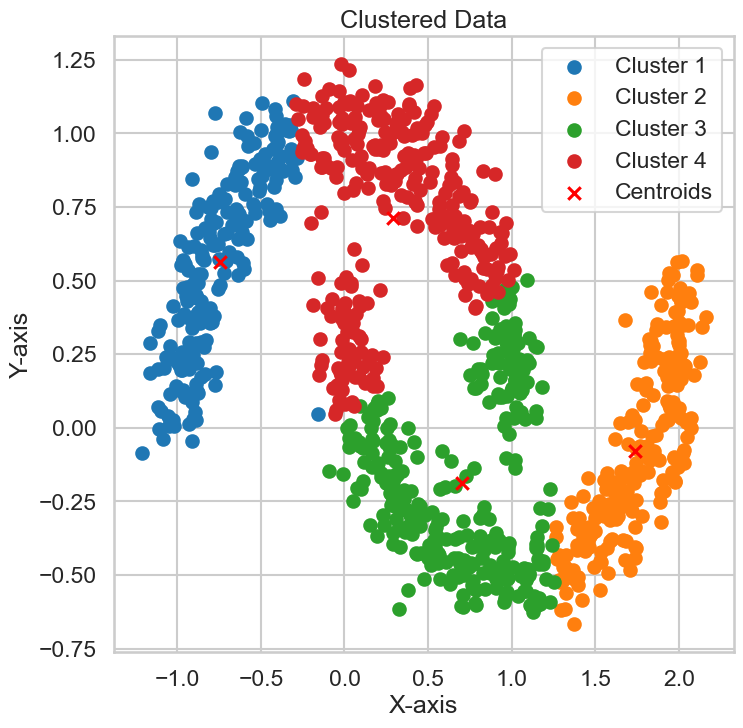

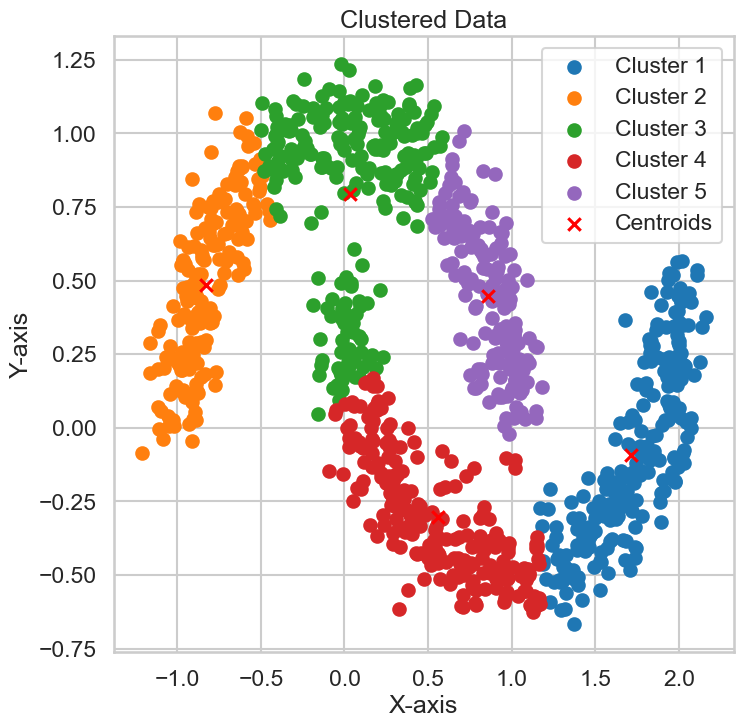

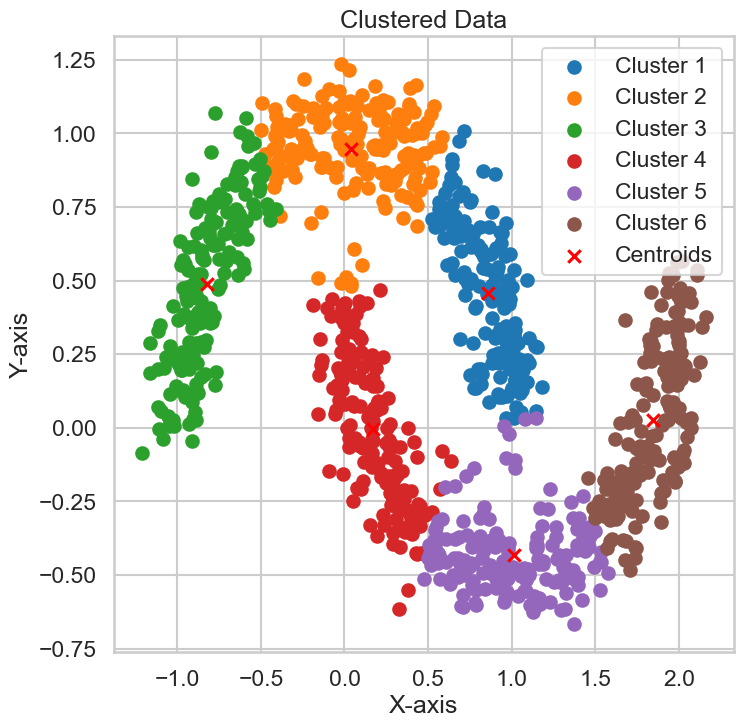

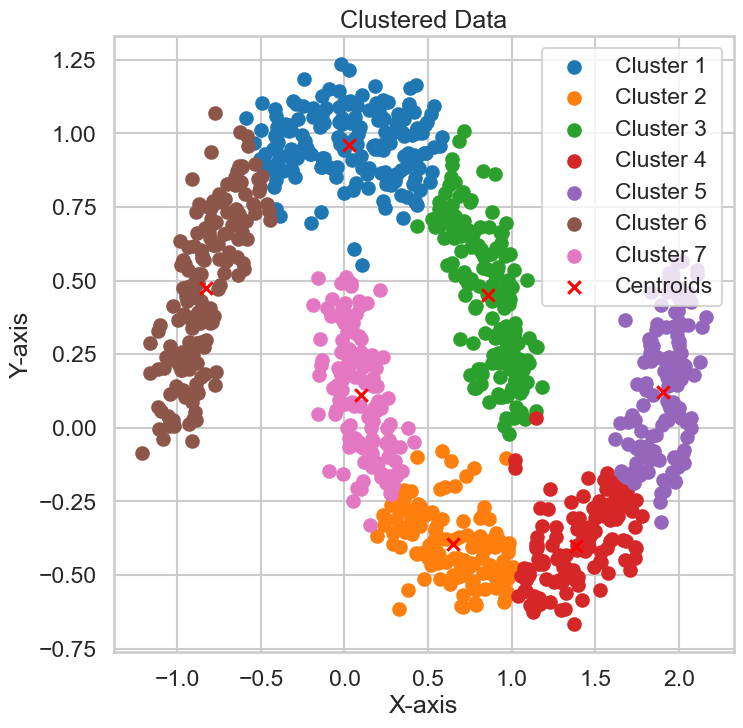

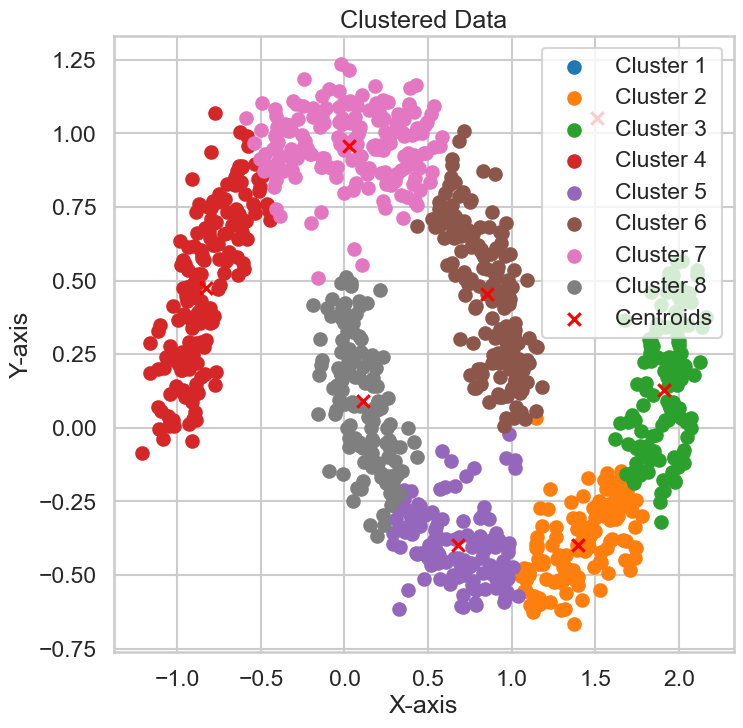

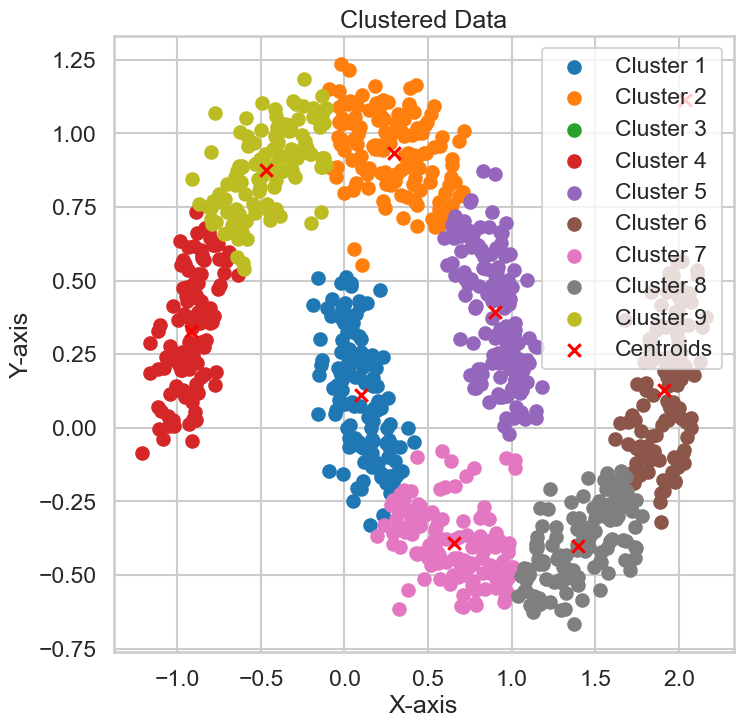

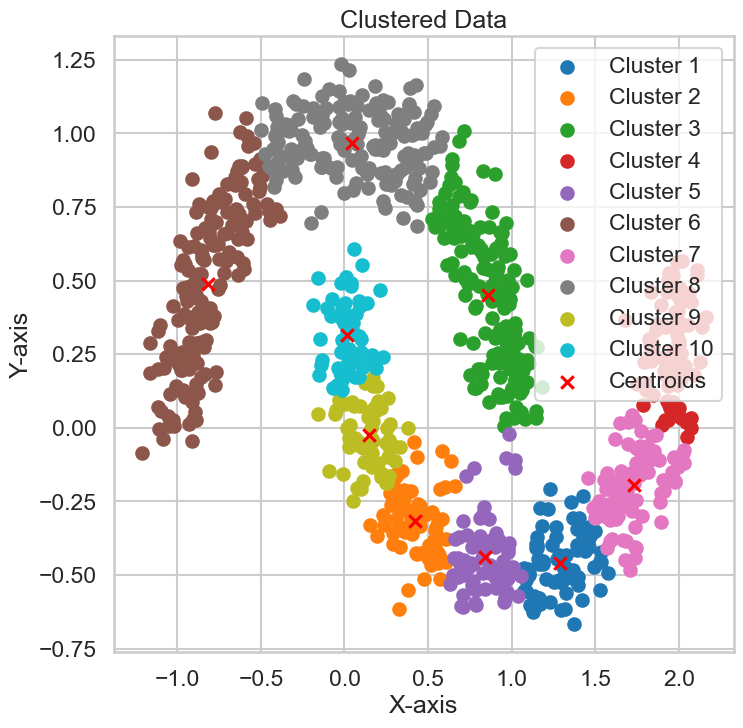

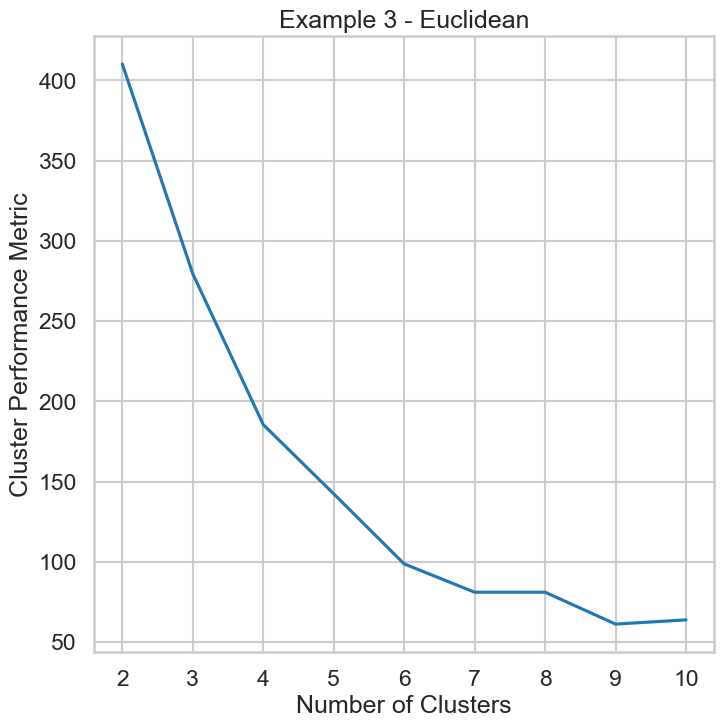

In [248]:
datasets = [(X1, 'Example 1'), (X2, 'Example 2'), (X3, 'Example 3')]
print(1)
for X, title in datasets:
    metrics = []
    for n_clusters in range(2, 11):
        try:
            _, distortion, _ = GUC_KmeanP(X, n_clusters, "euclidean")
            metrics.append(distortion)
        except RuntimeWarning as e:
            print(f"RuntimeWarning: {e}")
            continue
    plt.figure()
    plt.plot(range(2, 11), metrics)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Cluster Performance Metric')
    plt.title(f'{title} - Euclidean')
    plt.show()


C:\Users\yasmin\AppData\Local\Temp\ipykernel_7940\1099852721.py:22: RuntimeWarning: invalid value encountered in divide
  distances = 1 - numerator / denominator


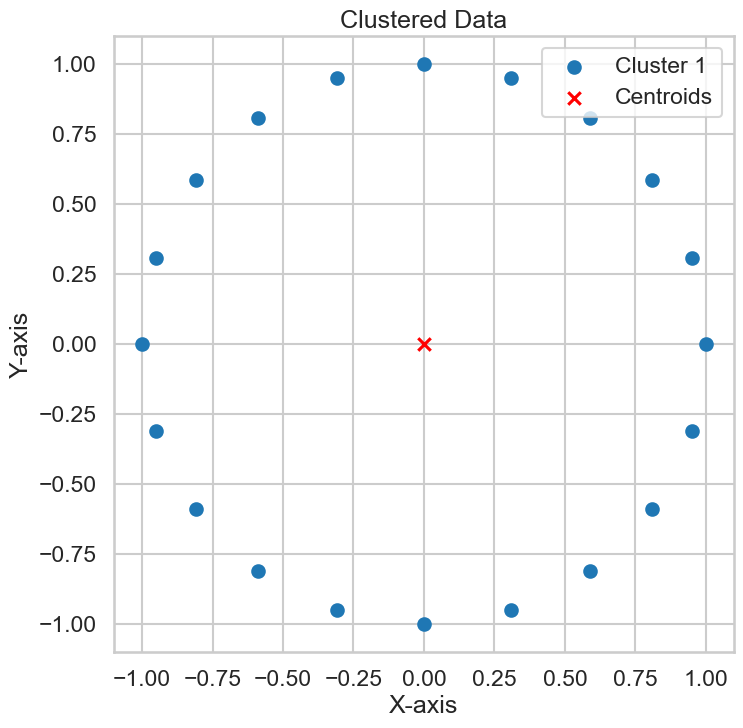

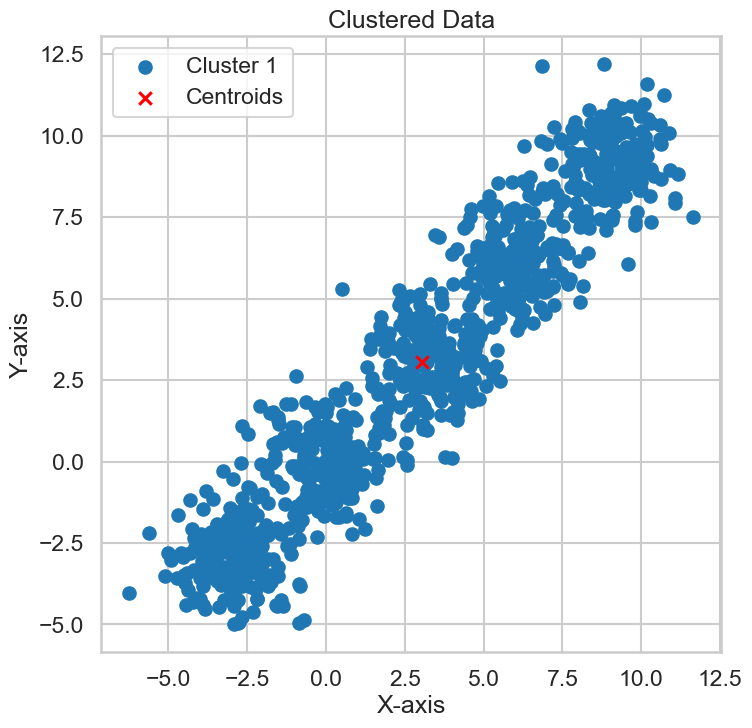

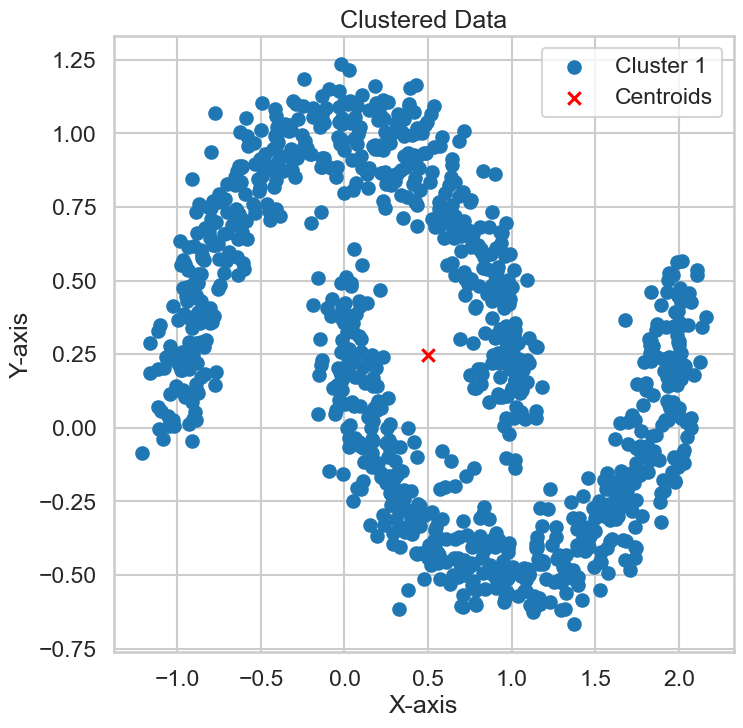

In [260]:
# Define your datasets
dataset1 = X1
dataset2 = X2
dataset3 = X3

# Call the GUC_Kmean function on each dataset
cluster_distances1, cluster_metric1, cluster_centroids1 = GUC_KmeanP(dataset1, 1, 'pearson')
cluster_distances2, cluster_metric2, cluster_centroids2 = GUC_KmeanP(dataset2, 1, 'pearson')
cluster_distances3, cluster_metric3, cluster_centroids3 = GUC_KmeanP(dataset3, 1, 'pearson')

1


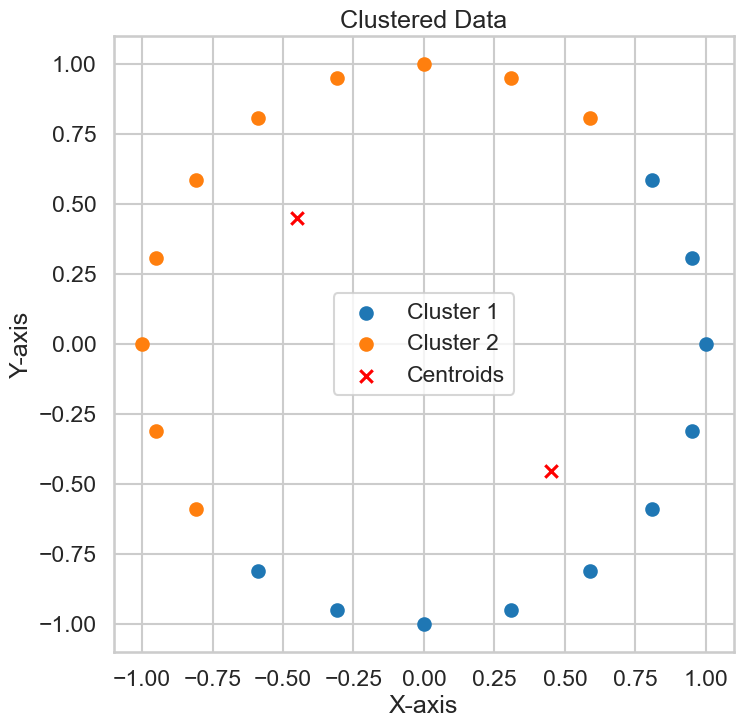

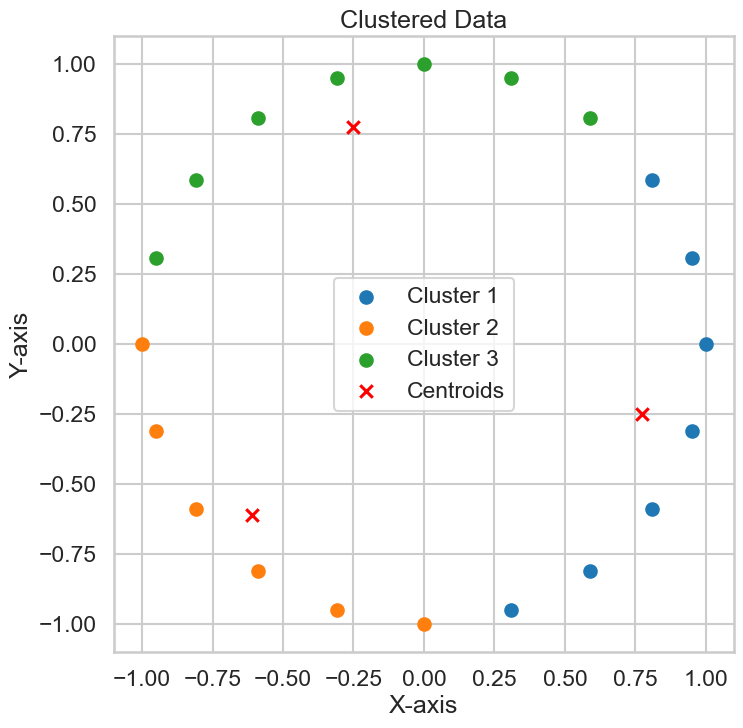

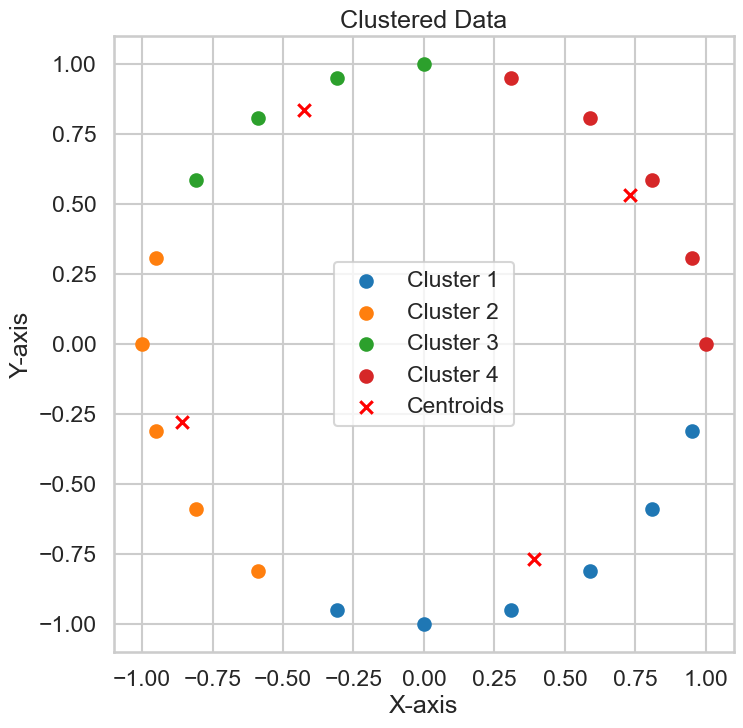

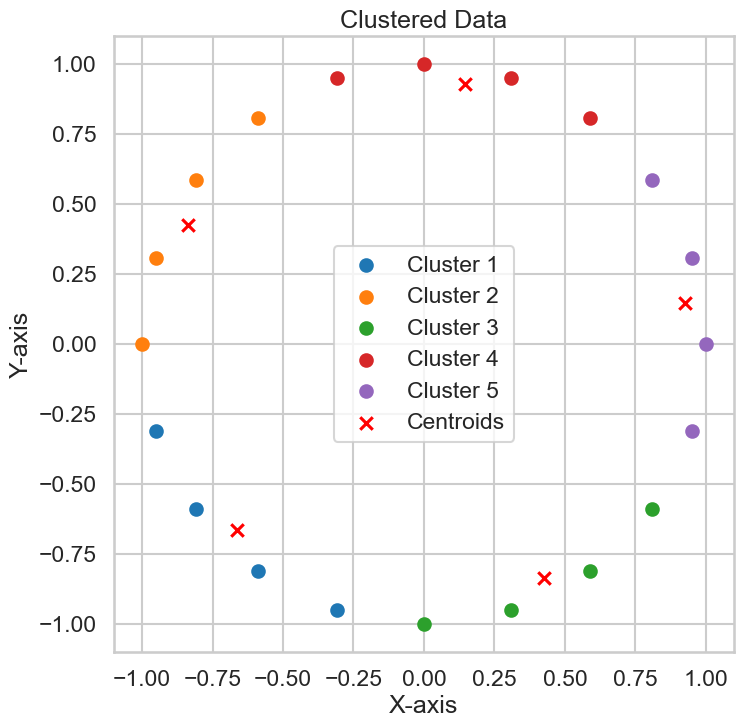

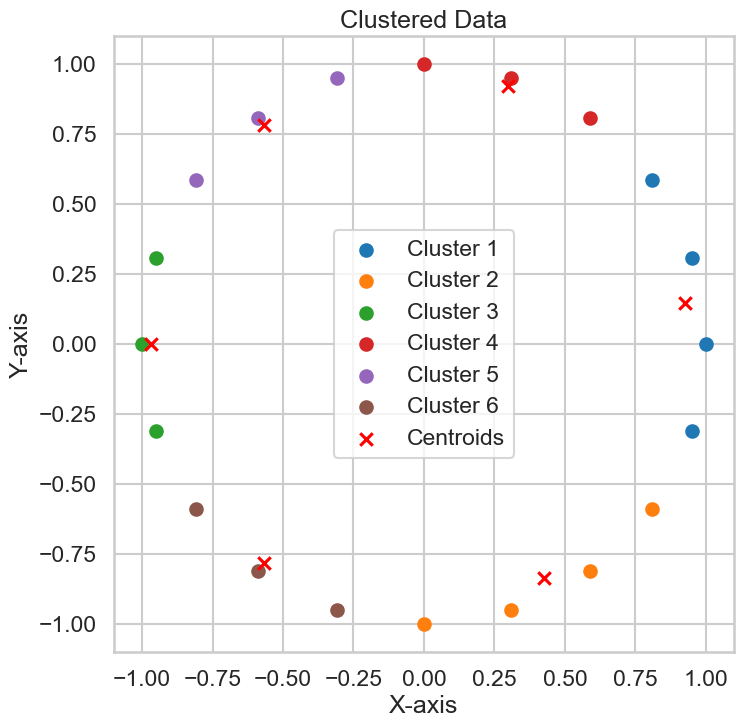

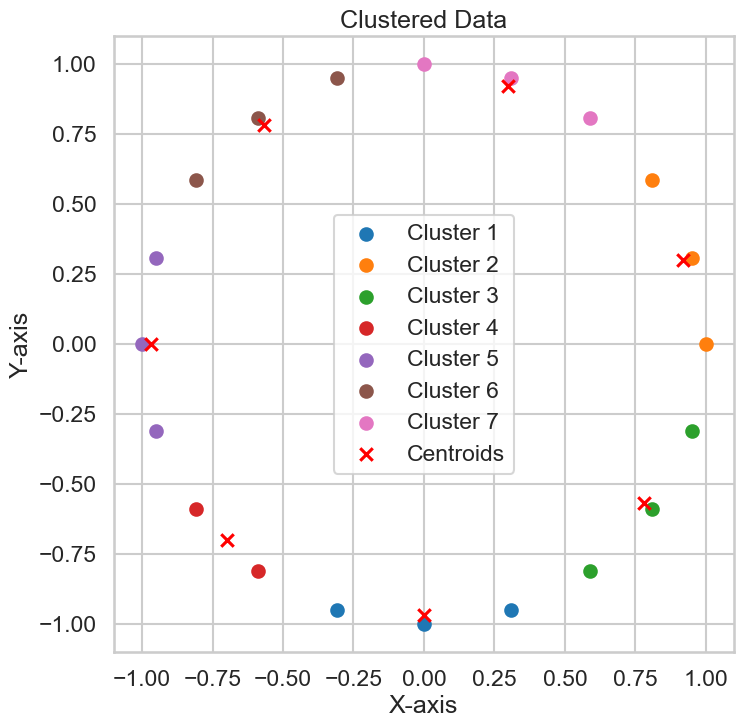

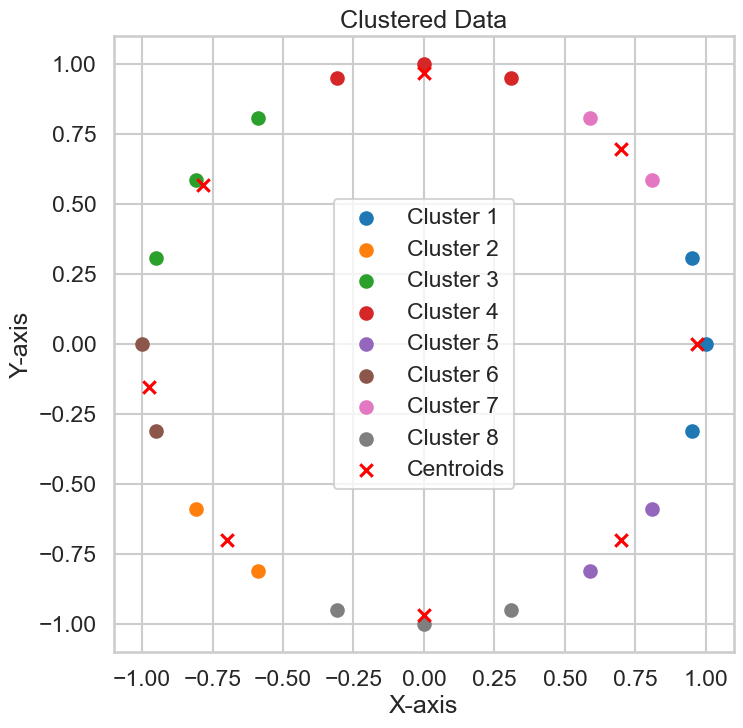

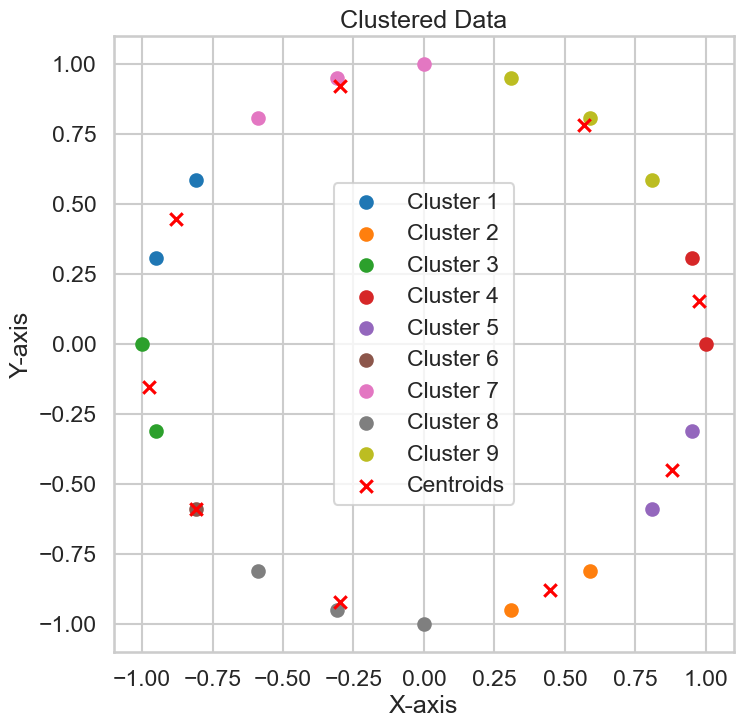

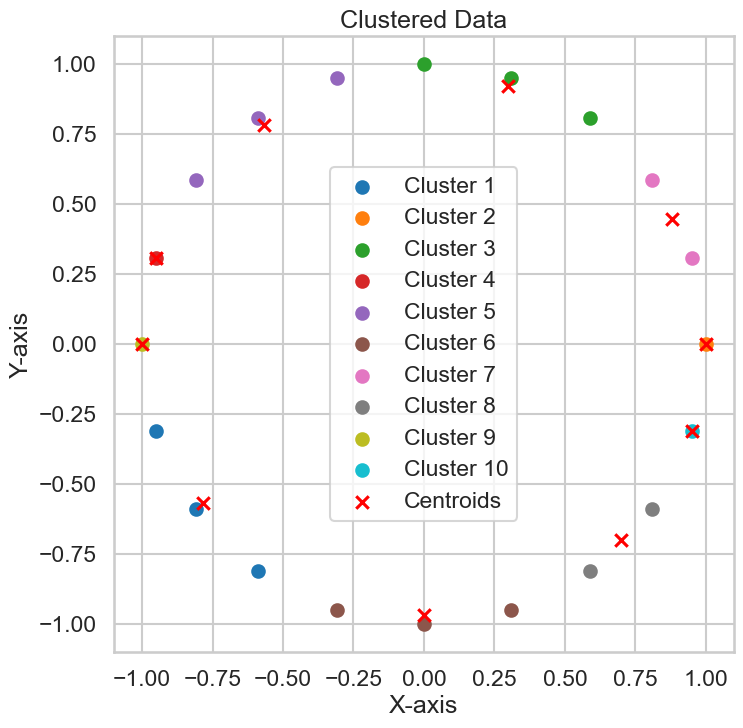

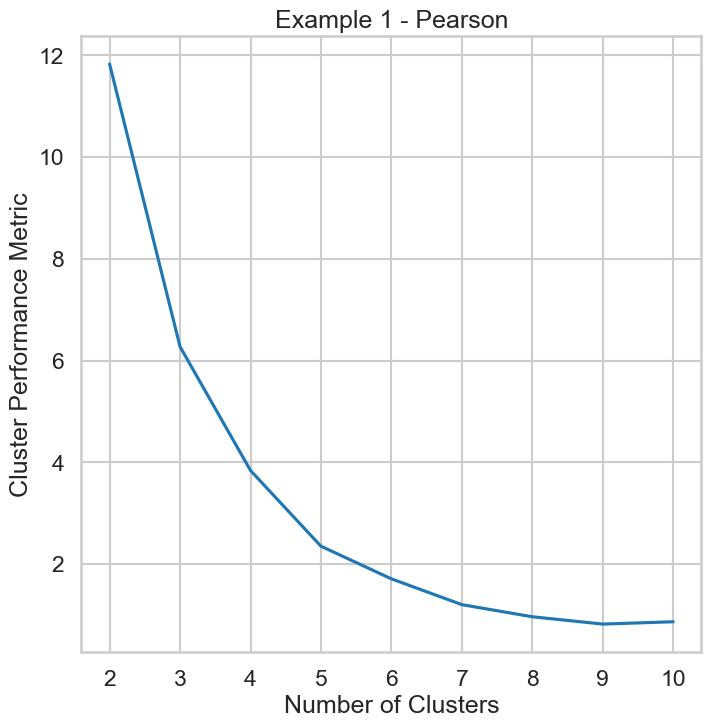

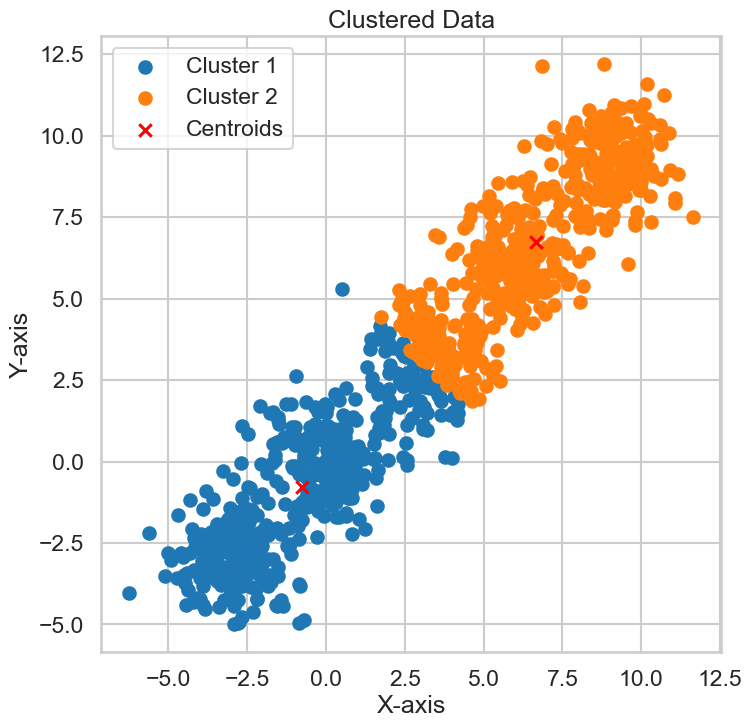

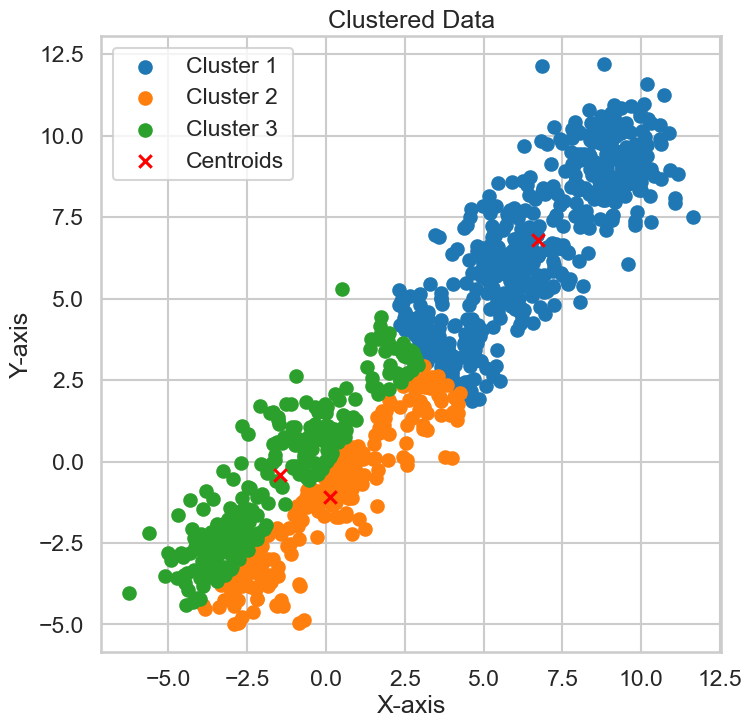

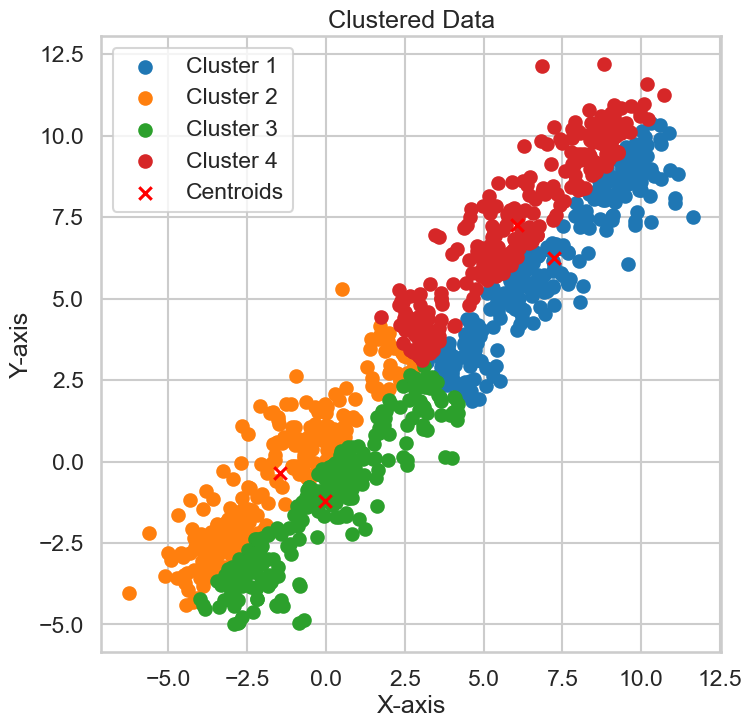

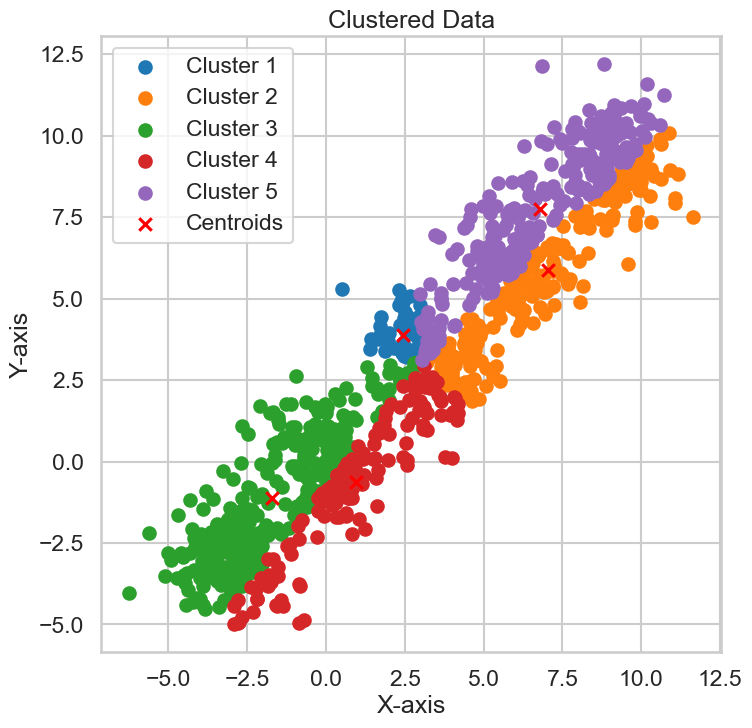

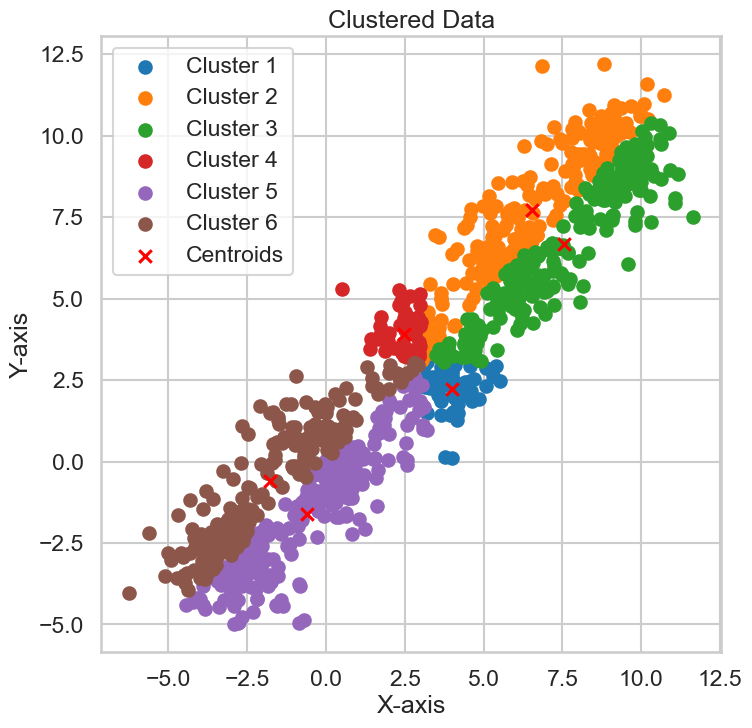

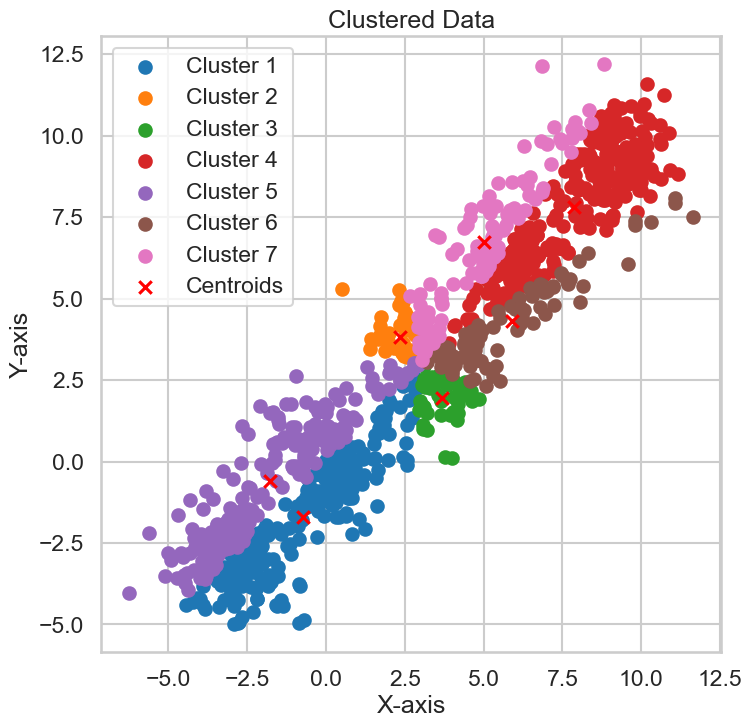

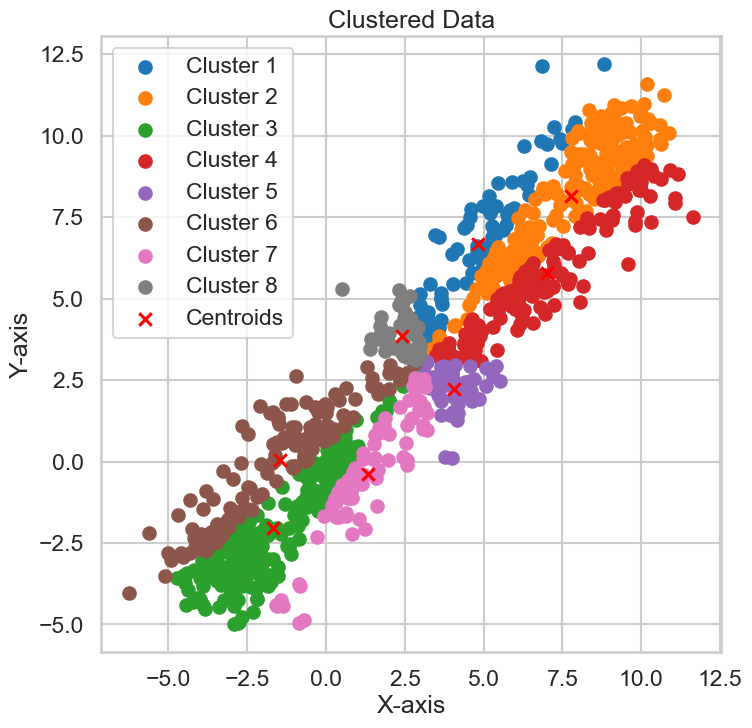

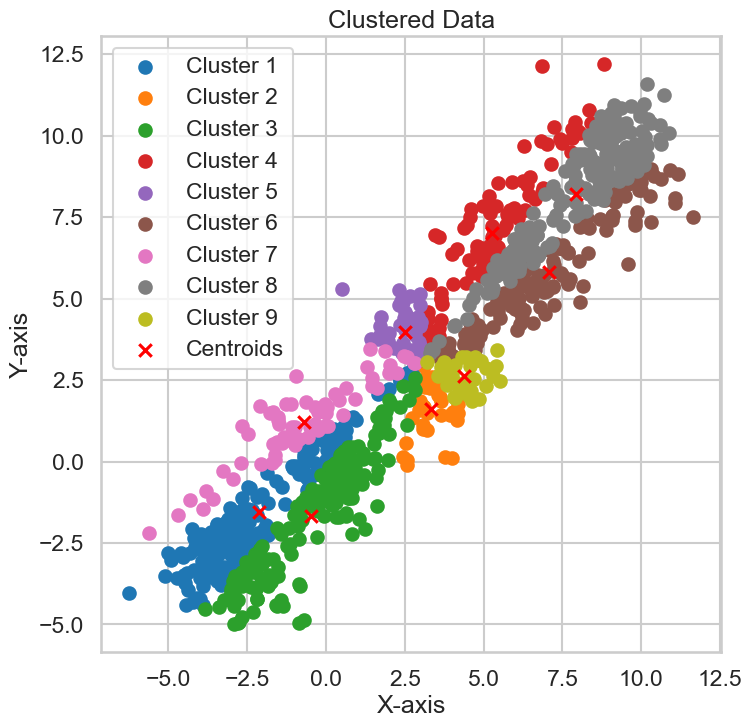

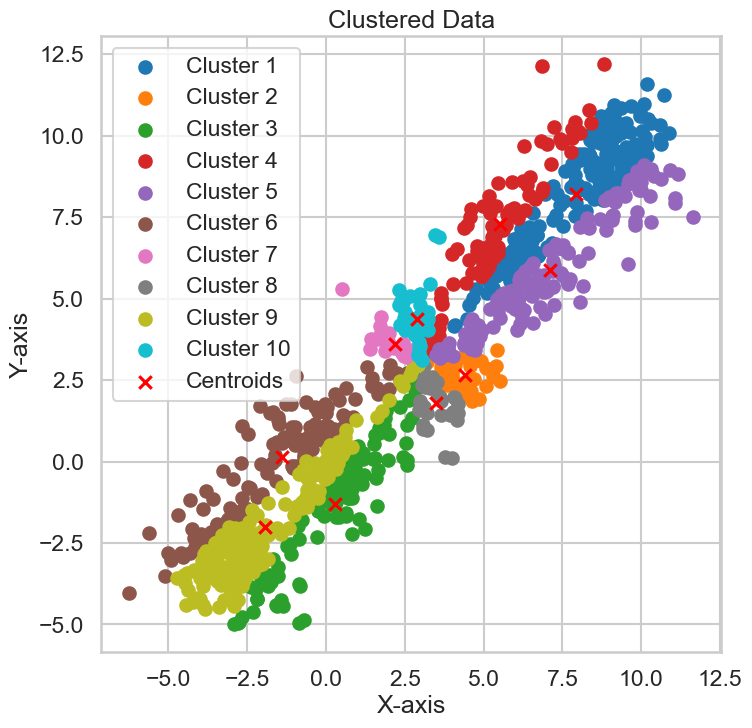

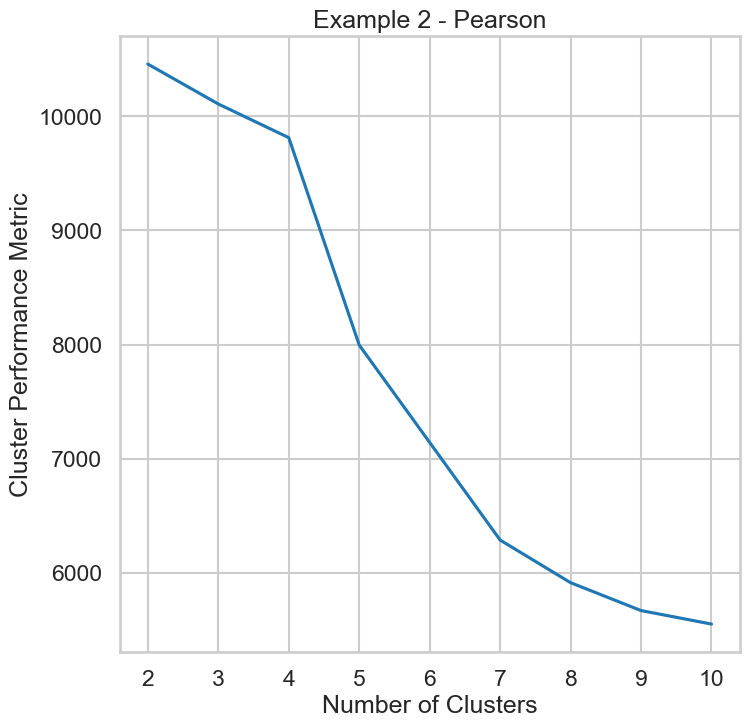

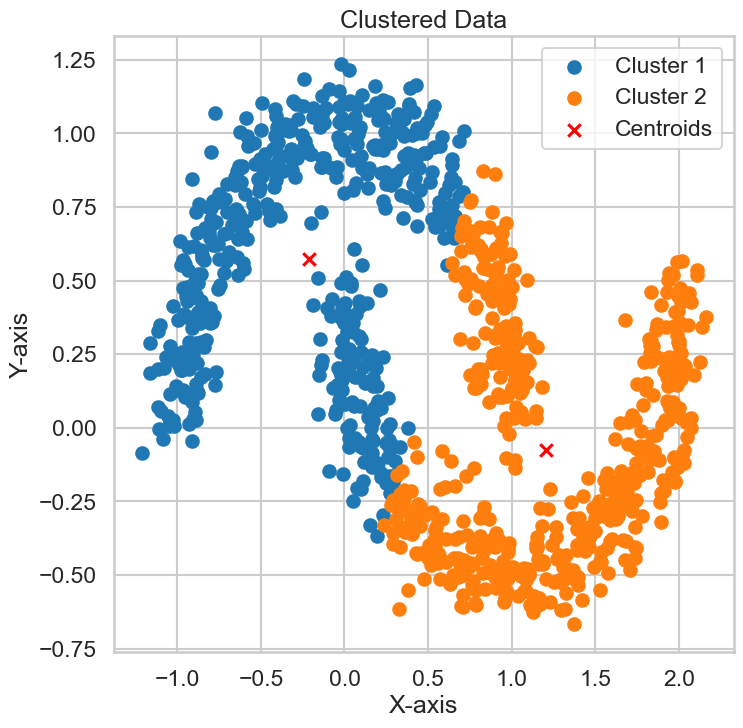

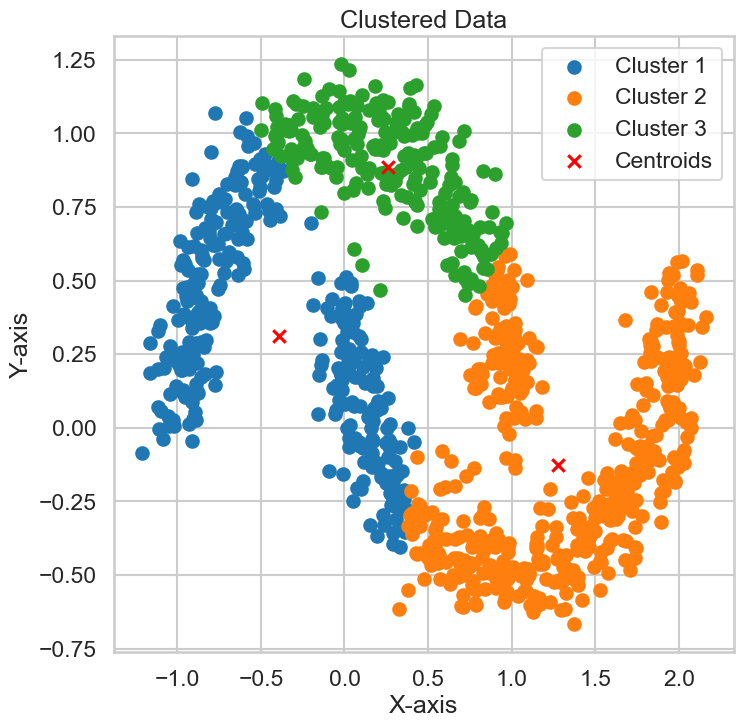

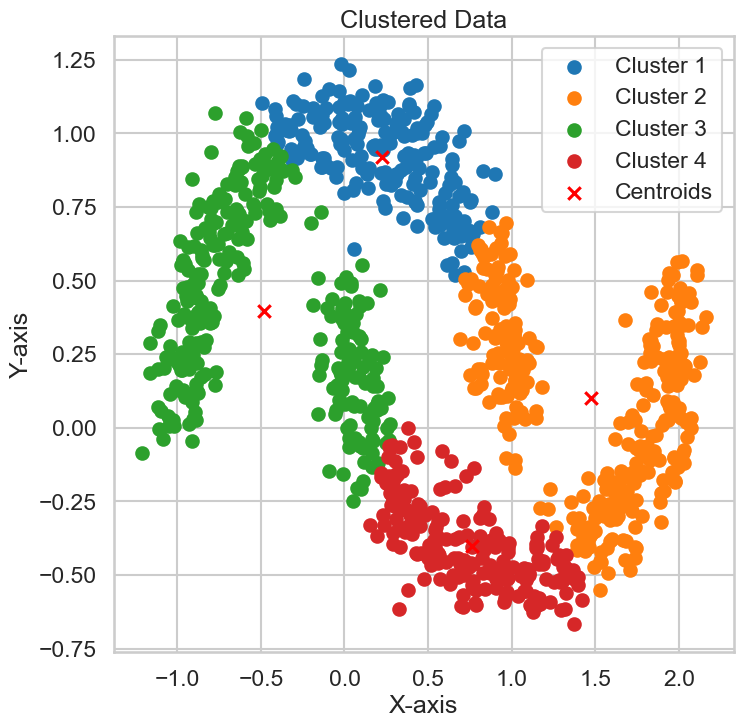

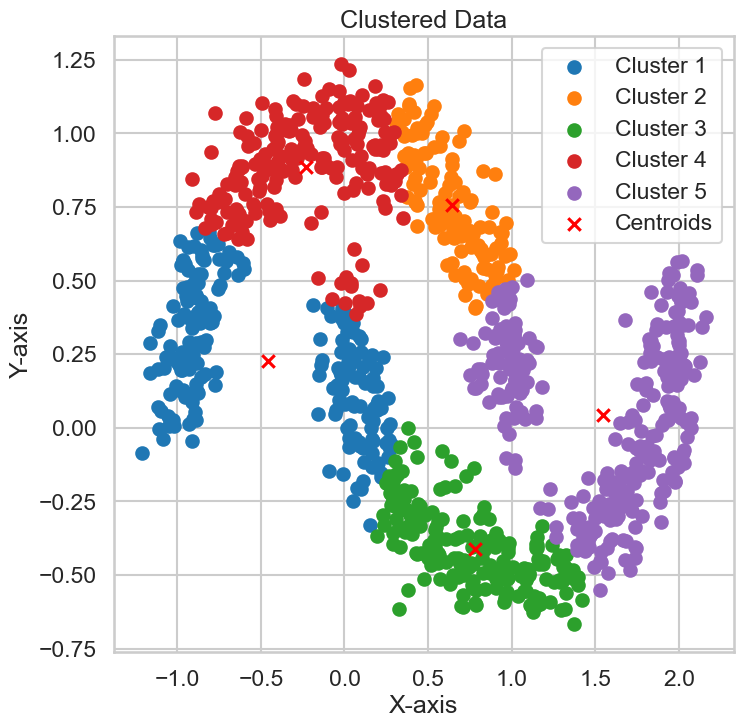

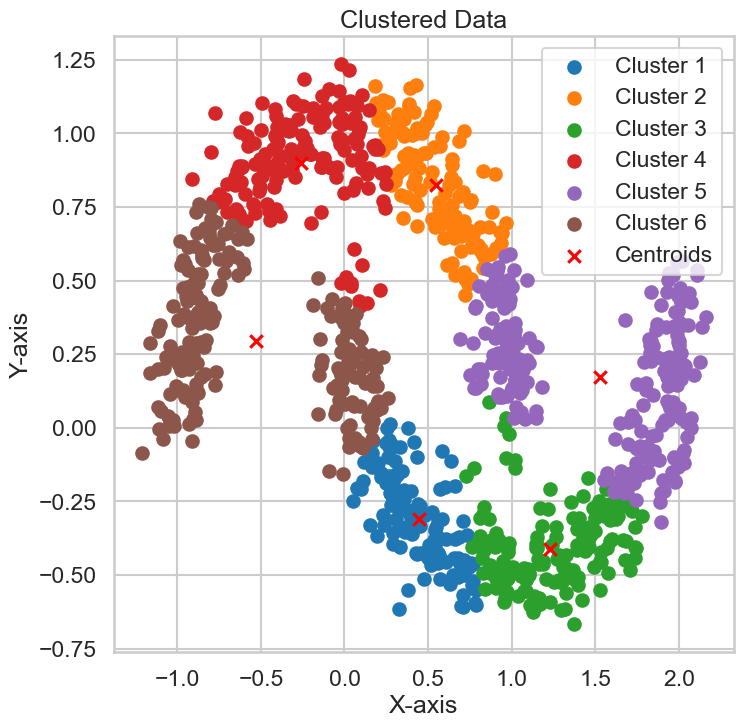

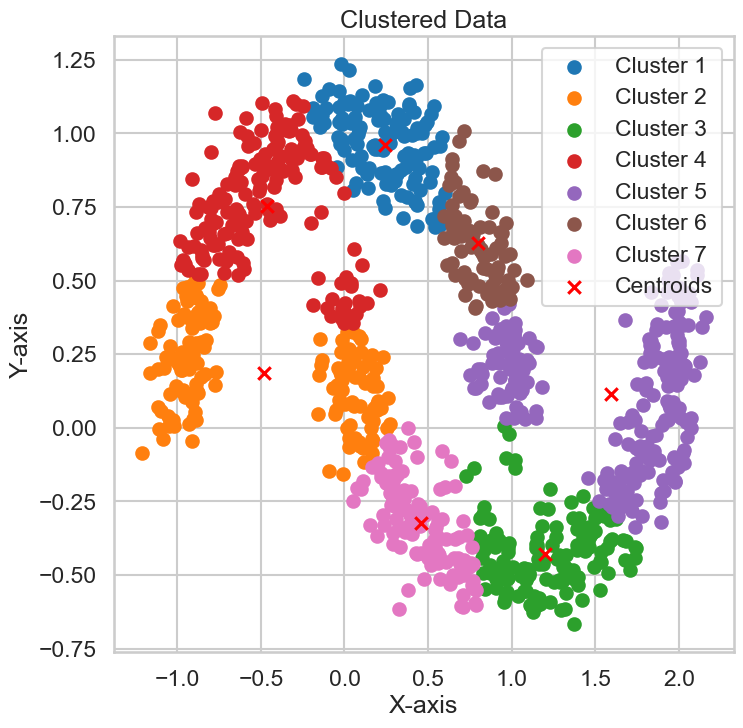

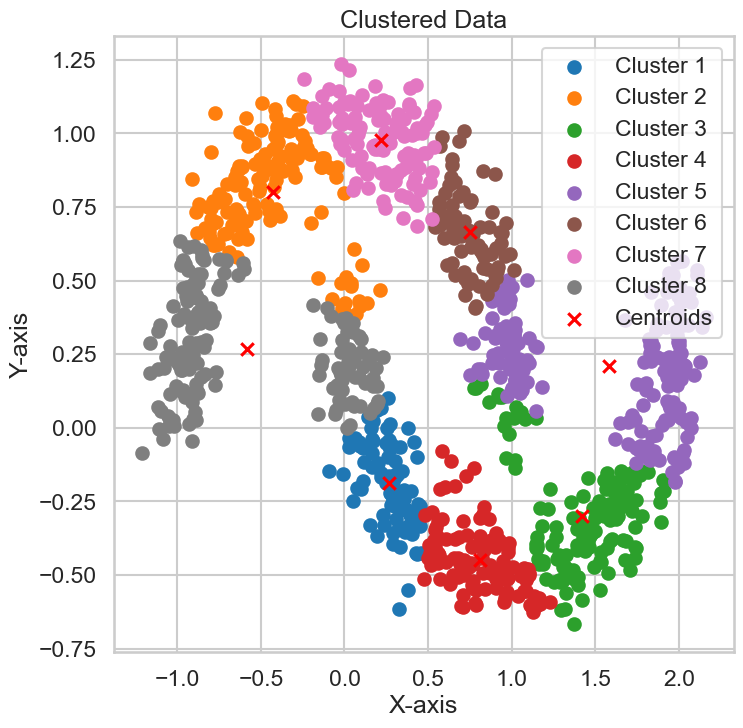

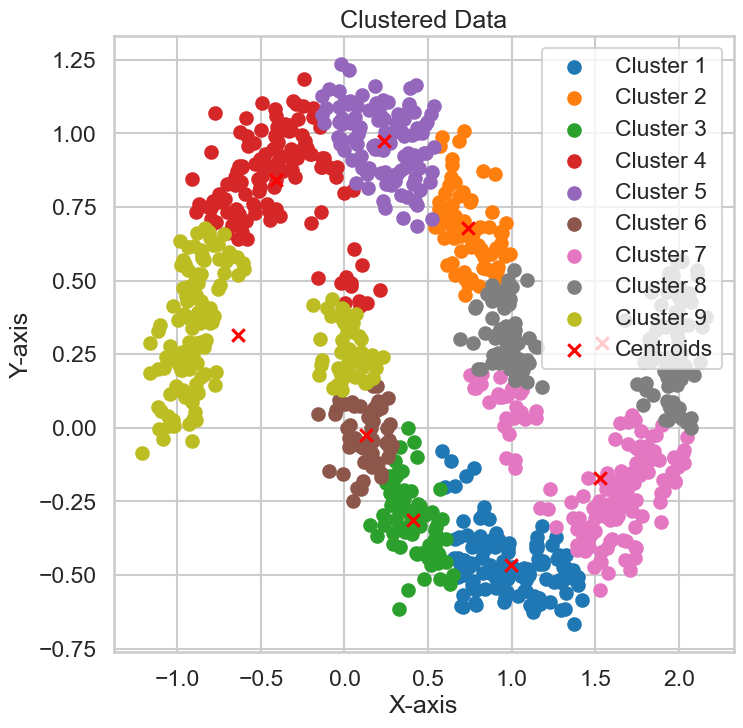

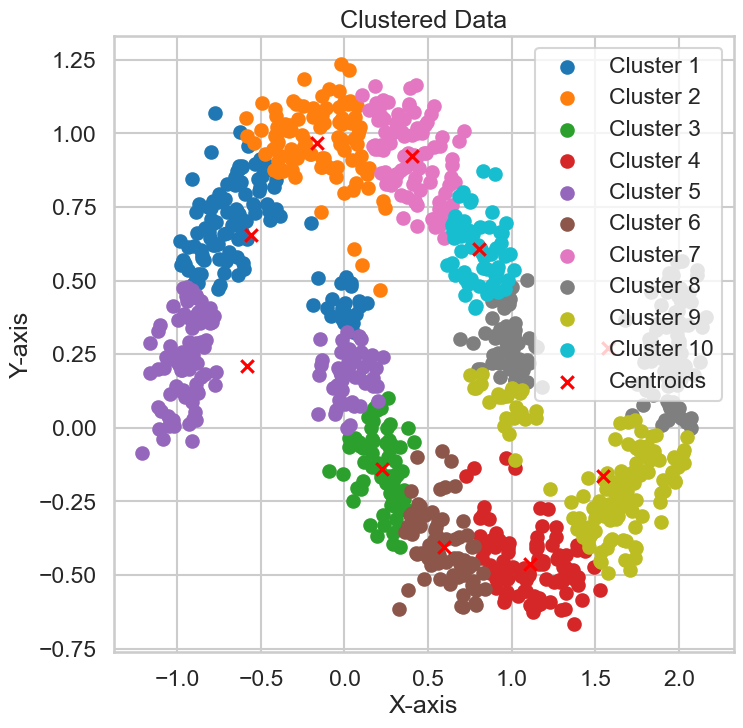

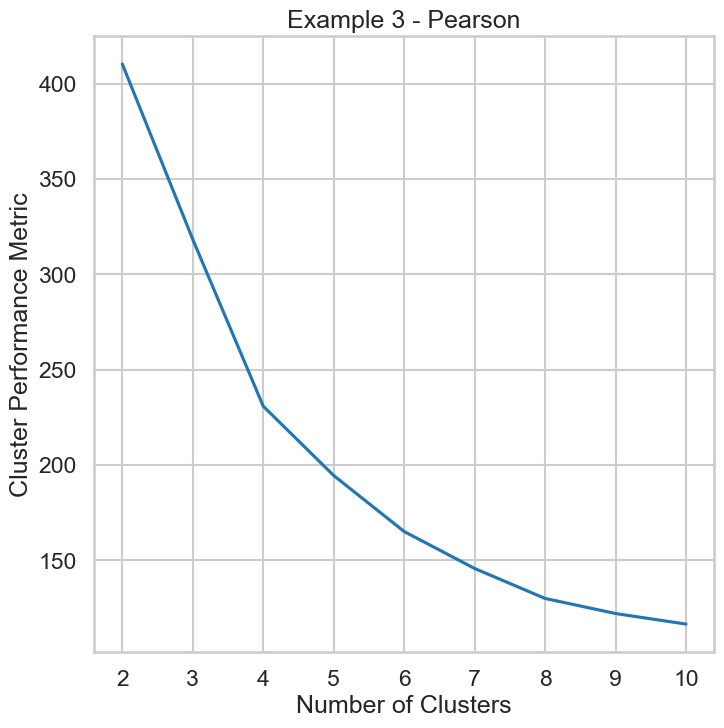

In [251]:
datasets = [(X1, 'Example 1'), (X2, 'Example 2'), (X3, 'Example 3')]
print(1)
for X, title in datasets:
    metrics = []
    for n_clusters in range(2, 11):
        try:
            _, distortion, _ = GUC_KmeanP(X, n_clusters, "pearson")
            metrics.append(distortion)
        except RuntimeWarning as e:
            print(f"RuntimeWarning: {e}")
            continue
    plt.figure()
    plt.plot(range(2, 11), metrics)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Cluster Performance Metric')
    plt.title(f'{title} - Pearson')
    plt.show()


## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

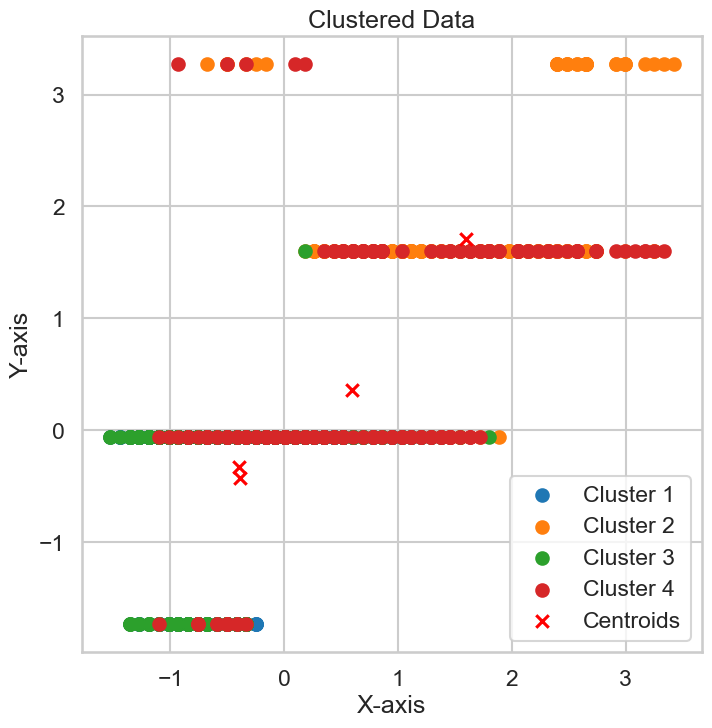

In [258]:
cluster_distances, cluster_metric, cluster_centroids = GUC_KmeanP(data2, 4, 'euclidean')


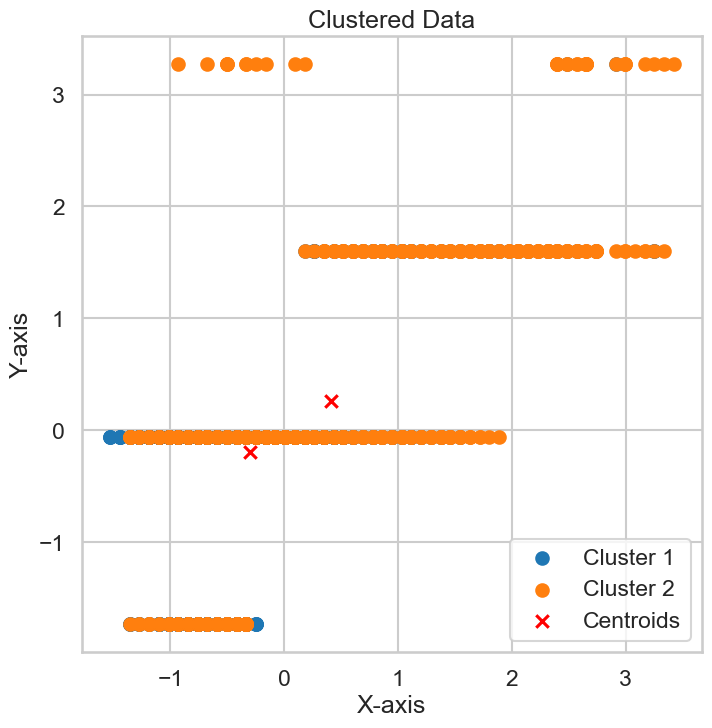

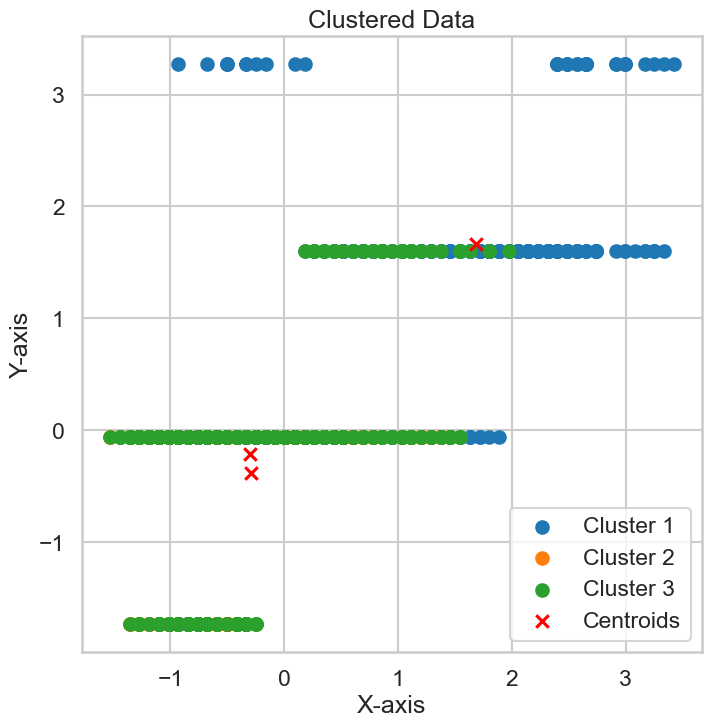

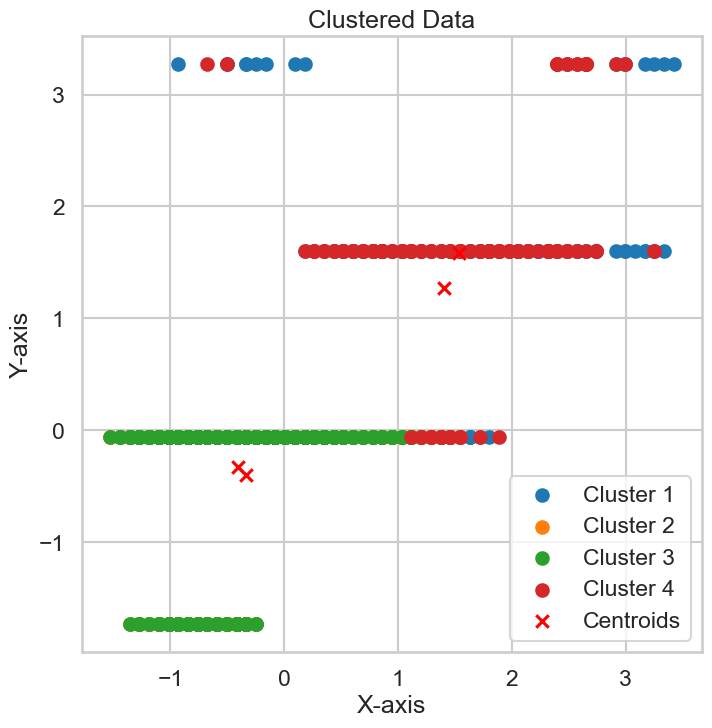

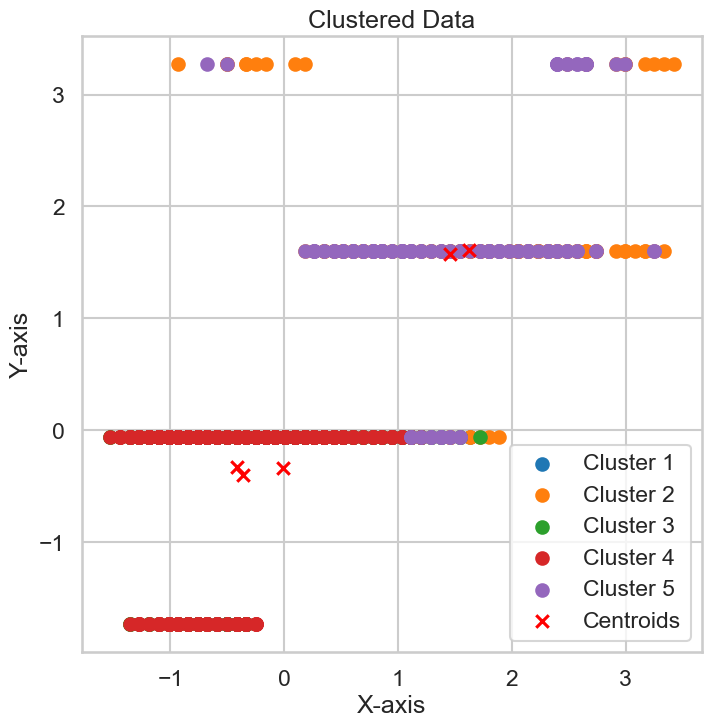

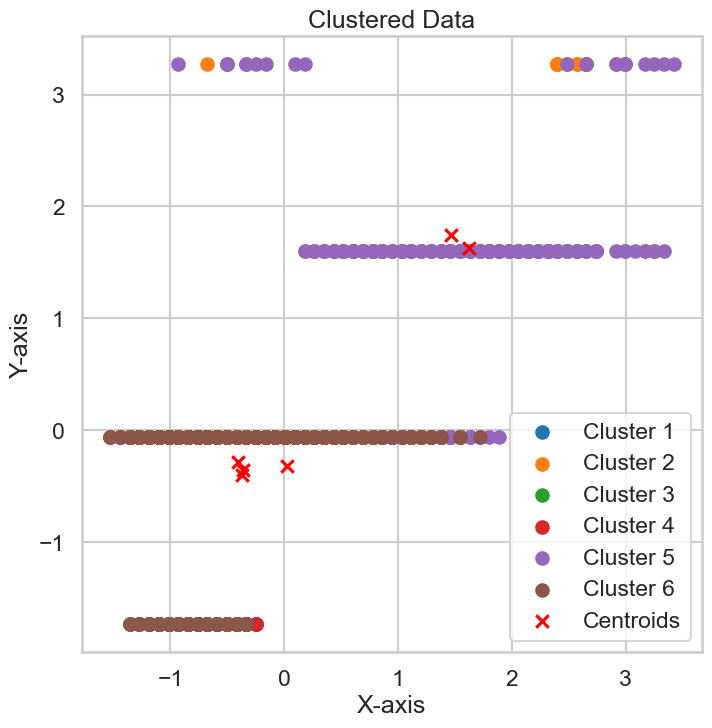

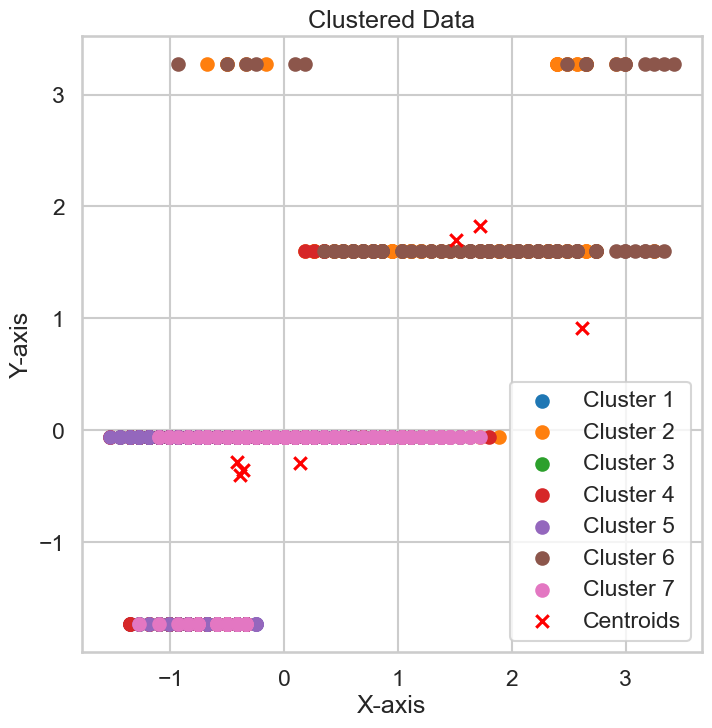

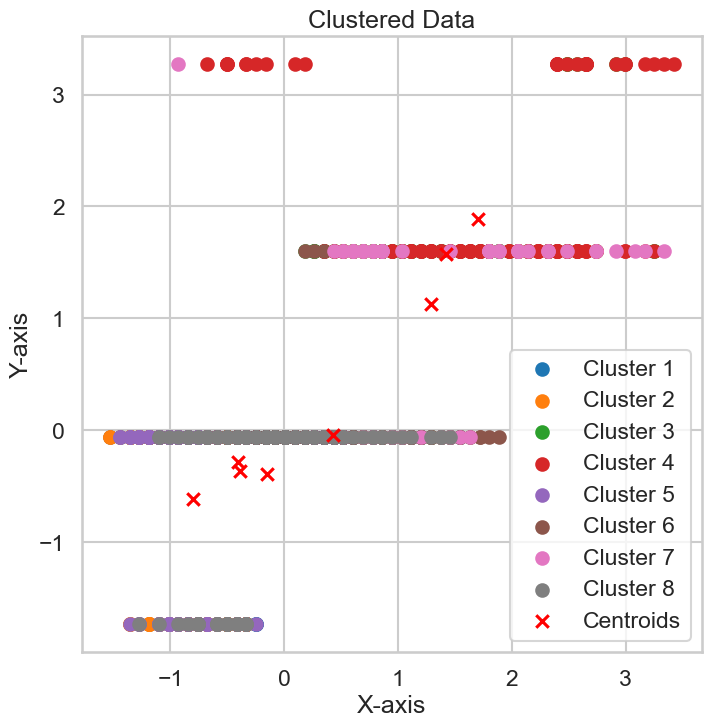

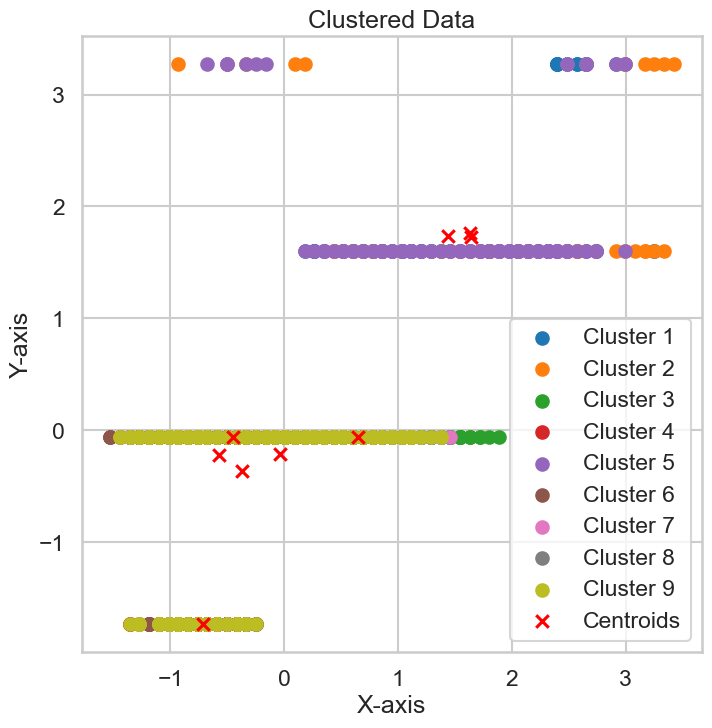

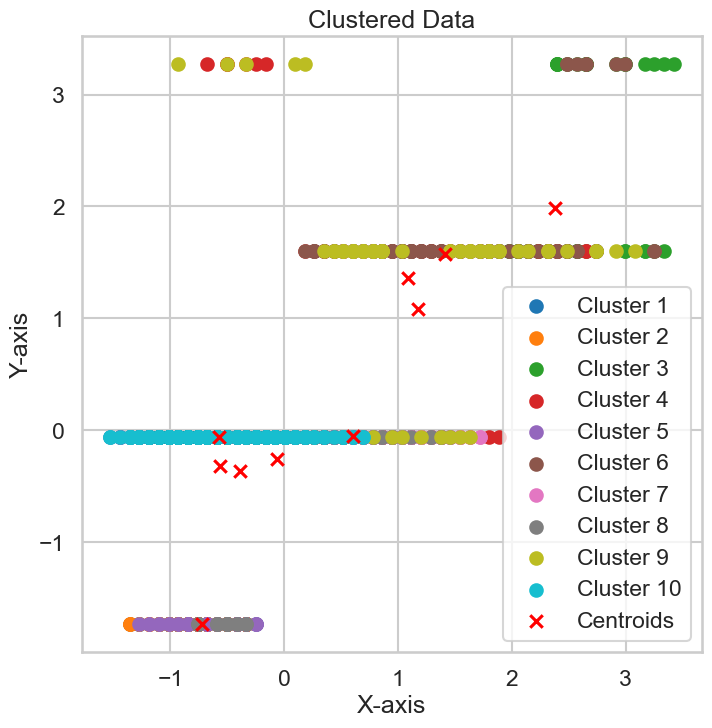

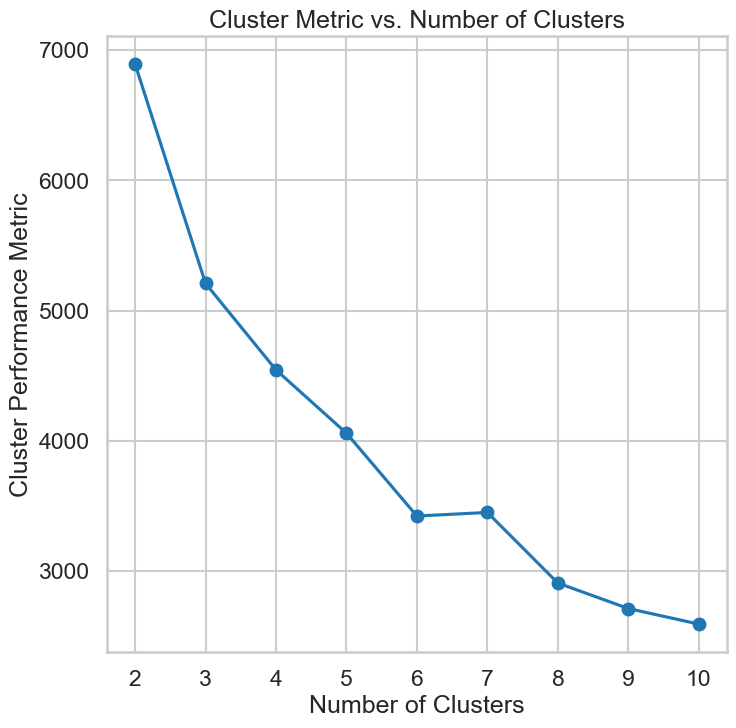

In [253]:
# Test K-means on customer data
def test_kmeans_on_customer_data(customer_data, distance_type='euclidean'):
    num_clusters_range = range(2, 11)
    cluster_metrics = []

    for num_clusters in num_clusters_range:
        _, distortion, _ = GUC_KmeanP(customer_data, num_clusters, distance_type)
        cluster_metrics.append(distortion)

    # Plot the Cluster Metric versus the number of clusters
    plt.plot(num_clusters_range, cluster_metrics, marker='o')
    plt.title('Cluster Metric vs. Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Cluster Performance Metric')
    plt.show()

# Example usage
test_kmeans_on_customer_data(data2)


1


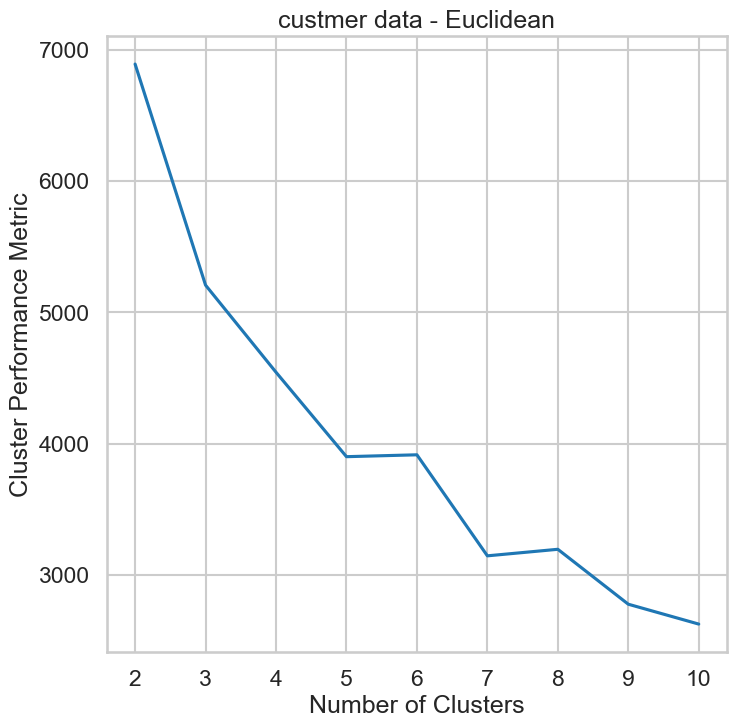

In [235]:
datasets = [(data2, 'custmer data')]
print(1)
for X, title in datasets:
    metrics = []
    for n_clusters in range(2, 11):
        try:
            _, distortion, _ = GUC_KmeanP(X, n_clusters, "euclidean")
            metrics.append(distortion)
        except RuntimeWarning as e:
            print(f"RuntimeWarning: {e}")
            continue
    plt.figure()
    plt.plot(range(2, 11), metrics)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Cluster Performance Metric')
    plt.title(f'{title} - Euclidean')
    plt.show()


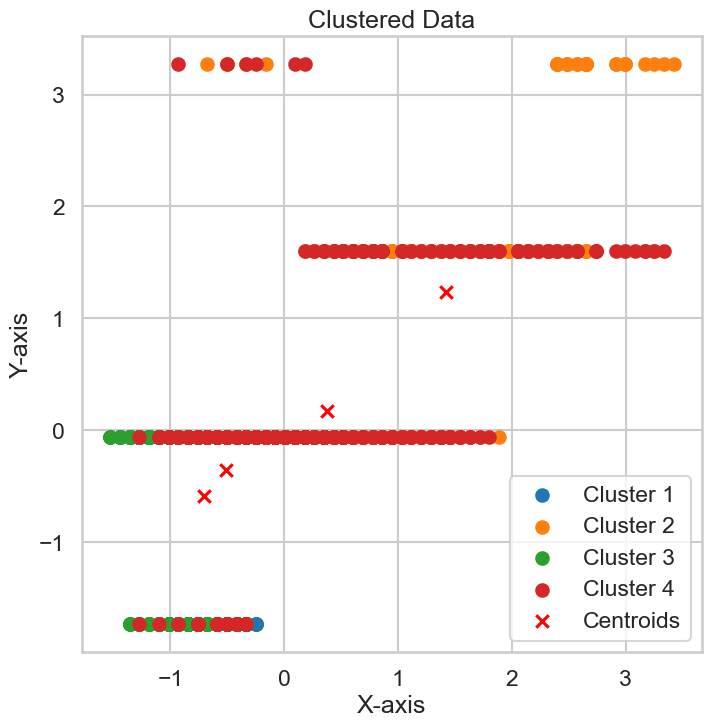

In [259]:
cluster_distances, cluster_metric, cluster_centroids = GUC_KmeanP(data2, 4, 'pearson')


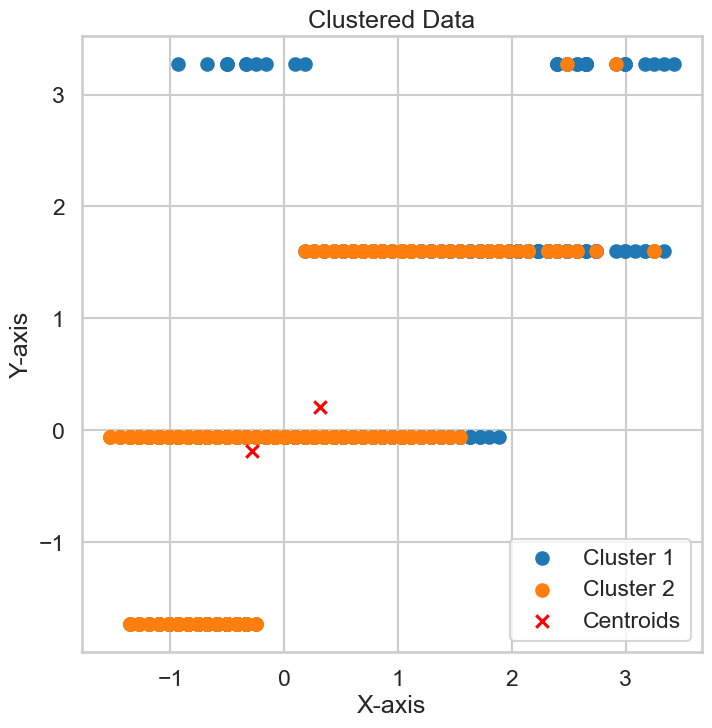

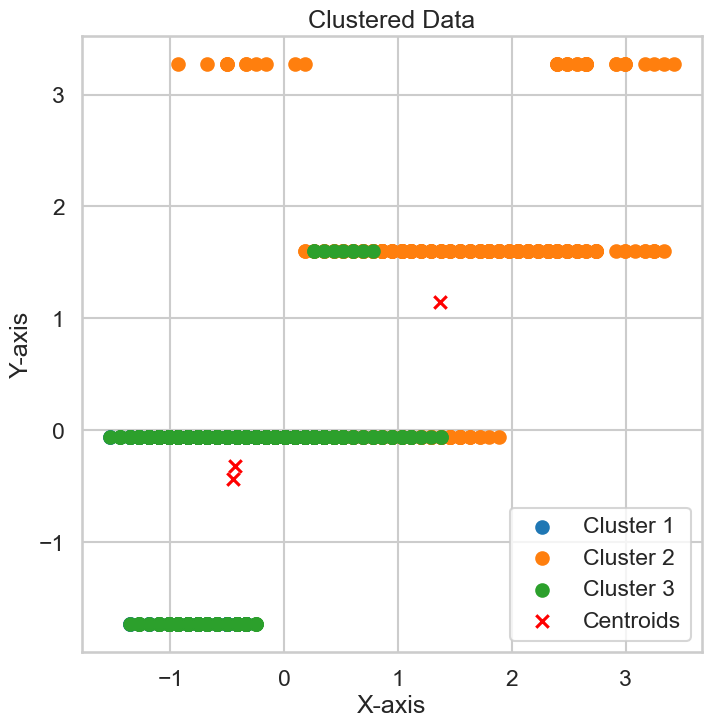

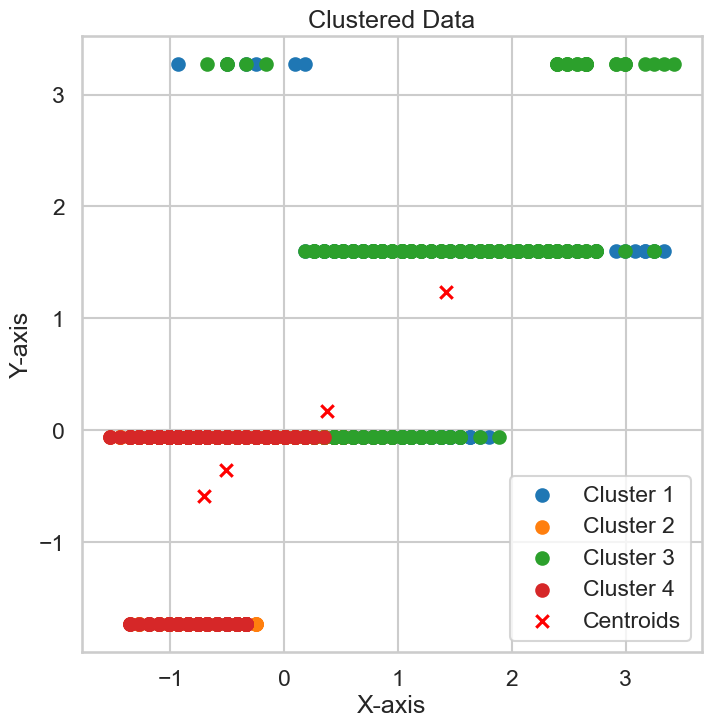

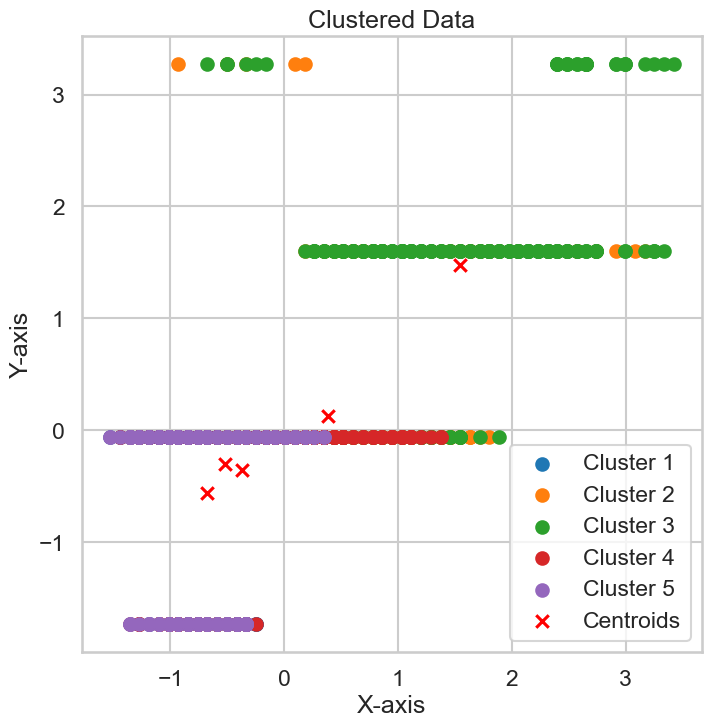

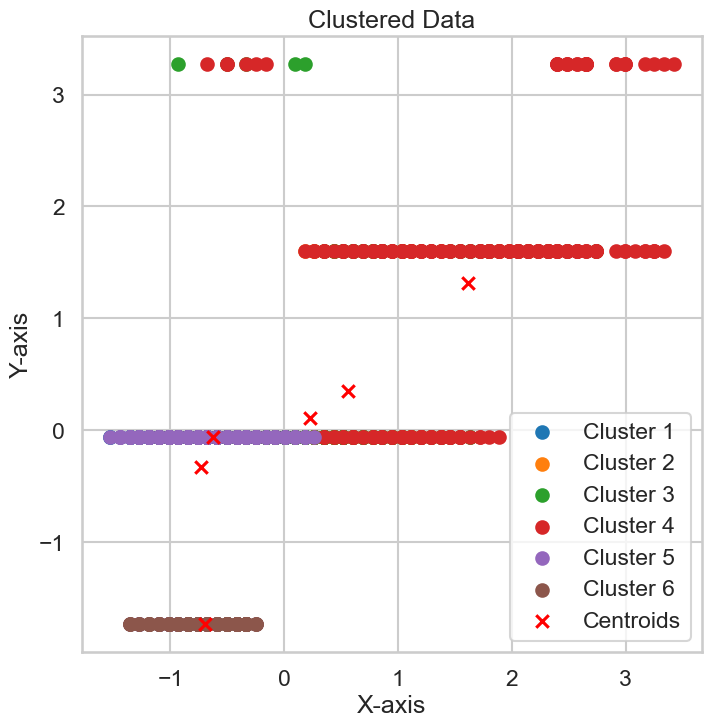

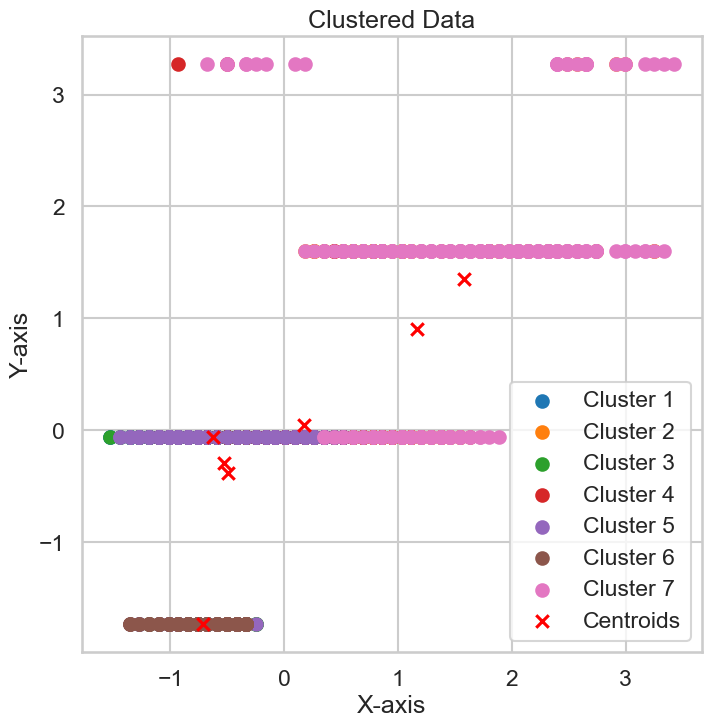

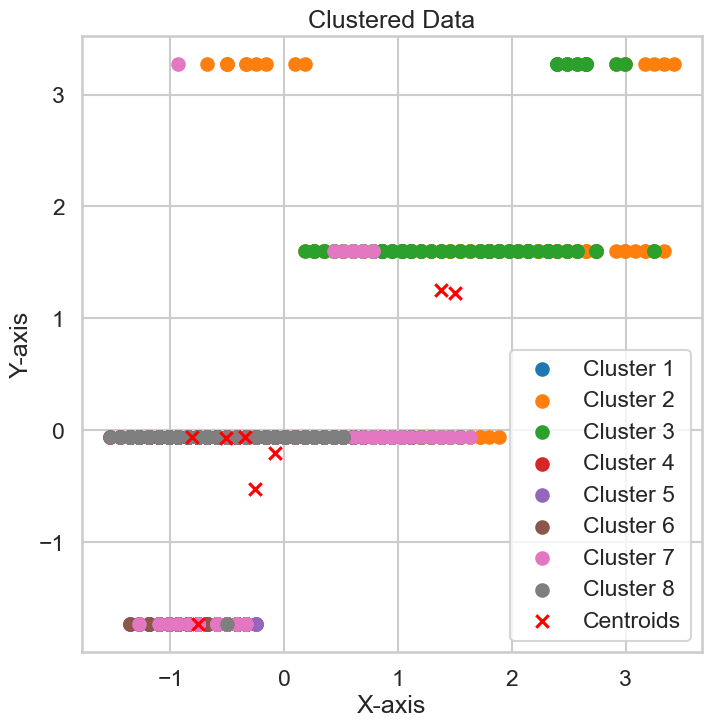

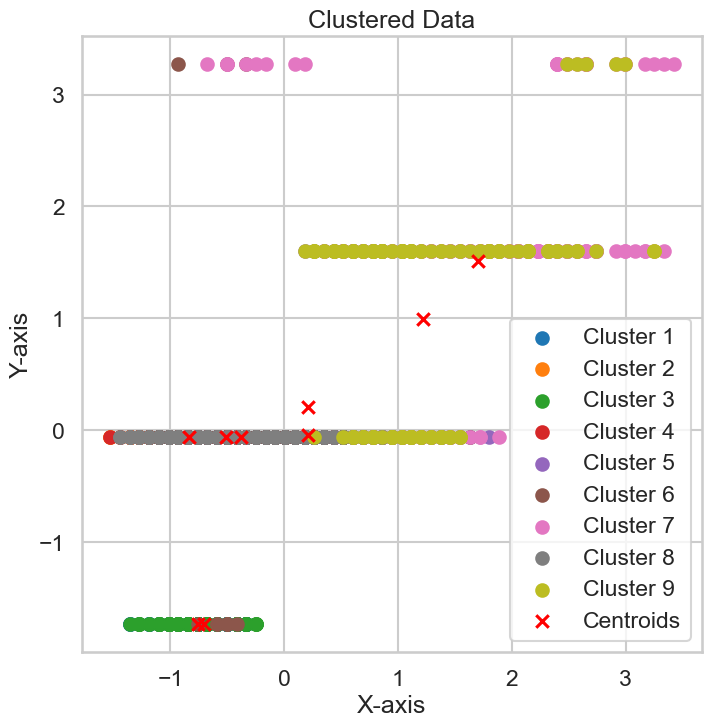

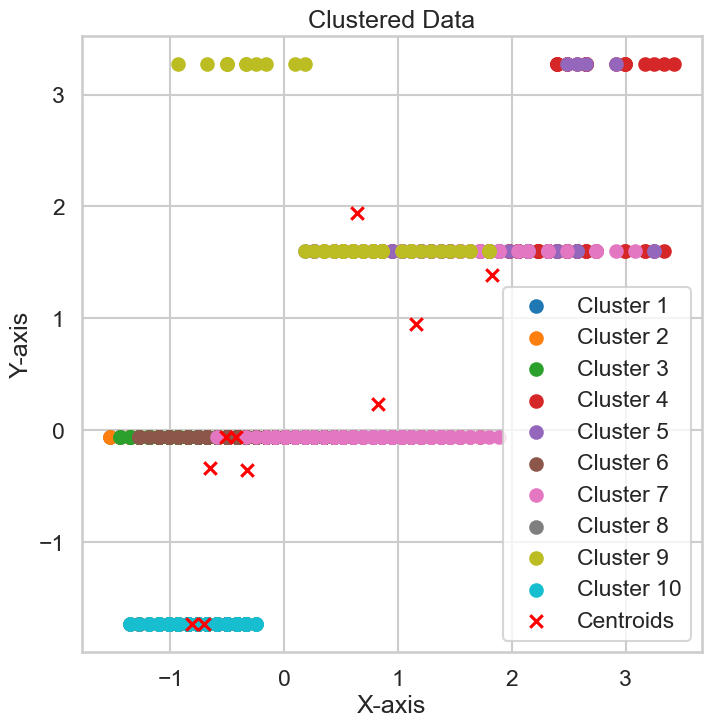

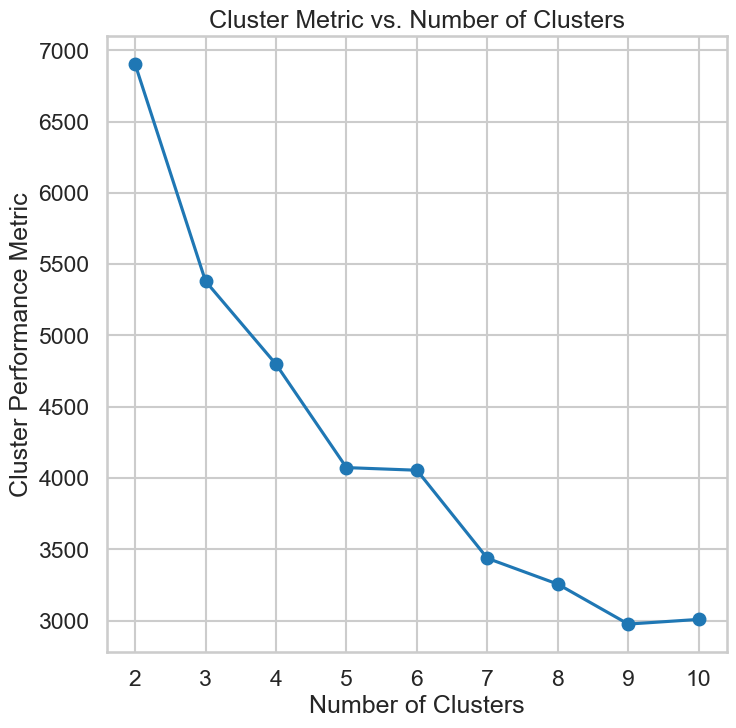

In [257]:
# Test K-means on customer data
def test_kmeans_on_customer_data(customer_data, distance_type='pearson'):
    num_clusters_range = range(2, 11)
    cluster_metrics = []

    for num_clusters in num_clusters_range:
        _, distortion, _ = GUC_KmeanP(customer_data, num_clusters, distance_type)
        cluster_metrics.append(distortion)

    # Plot the Cluster Metric versus the number of clusters
    plt.plot(num_clusters_range, cluster_metrics, marker='o')
    plt.title('Cluster Metric vs. Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Cluster Performance Metric')
    plt.show()

# Example usage
test_kmeans_on_customer_data(data2)


1


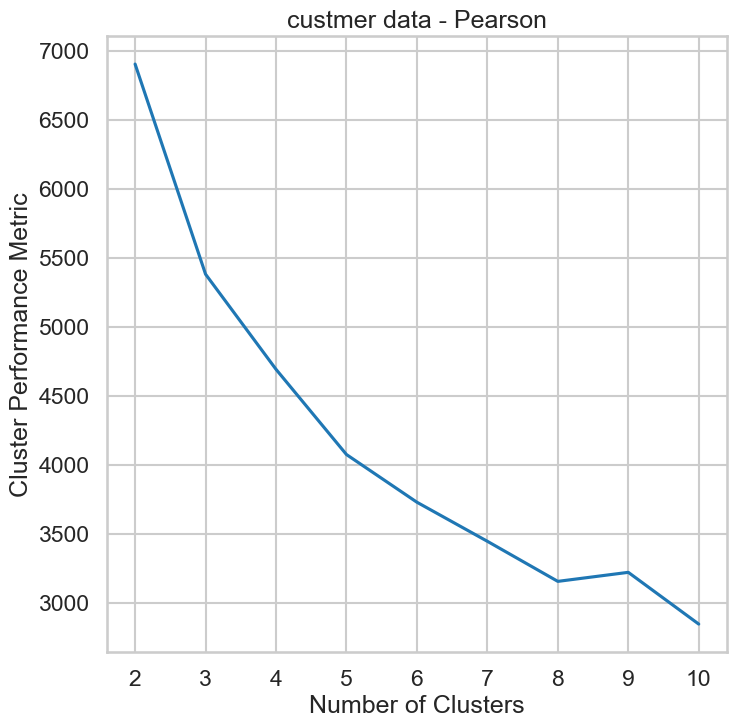

In [239]:
datasets = [(data2, 'custmer data')]
print(1)
for X, title in datasets:
    metrics = []
    for n_clusters in range(2, 11):
        try:
            _, distortion, _ = GUC_Kmean(X, n_clusters, "pearson")
            metrics.append(distortion)
        except RuntimeWarning as e:
            print(f"RuntimeWarning: {e}")
            continue
    plt.figure()
    plt.plot(range(2, 11), metrics)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Cluster Performance Metric')
    plt.title(f'{title} - Pearson')
    plt.show()
